# DATA VISUALIZATION

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
import datetime
import pickle
from scipy import stats
from scipy.stats import skew, norm
from IPython.display import display

pd.set_option('display.max_columns', None) # no truncate columns

## Load dataframes

In [38]:
# Environment settings
data_path_out = 'Data/output/'
    
# Deserialize previously saved data from "data-visualization"
df = {}
for df_name in ['train', 'test', 'all']:
    with open(data_path_out+df_name+'_dv.obj', 'rb') as file:
        df[df_name] = pickle.load(file)

## Show Data

In [39]:
# Dataframes shape
for d_name, d in df.items():
    print('{} set has shape {}\n'.format(d_name, d.shape))

train set has shape (523021, 36)

test set has shape (45689, 34)

all set has shape (568710, 34)



In [40]:
df['all'][(df['all']['StoreID']==1001)]

StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
729        1001 2016-03-01      False    True          False  Super Market   
730        1001 2016-03-02      False    True          False  Super Market   
731        1001 2016-03-04      False    True          False  Super Market   
732        1001 2016-03-05      False    True          False  Super Market   
733        1001 2016-03-06      False   False          False  Super Market   
734        1001 2016-03-07      False    True           True  Super Market   
735        1001 2016-03-08      False    True           True  Super Market   
736        1001 2016-03-09      False    True           True  Super Market   
737        1001 2016-03-10      False    True           True  Super Market   
738        1001 2016-03-11      False    True           True  Super Market   
739        1001 2016-03-12      False    True          False  Super Market   
740        1001 2016-03-13      False   False          False  Super Market   
741        1001 2016-03-14      False    True          False  Super Market   
742        1001 2016-03-15      False    True          False  Super Market   
743        1001 2016-03-16      False    True          False  Super Market   
744        1001 2016-03-17      False    True          False  Super Market   
745        1001 2016-03-18      False    True          False  Super Market   
746        1001 2016-03-19      False    True          False  Super Market   
747        1001 2016-03-20      False   False          False  Super Market   
748        1001 2016-03-21      False    True           True  Super Market   
749        1001 2016-03-22      False    True           True  Super Market   
750        1001 2016-03-23      False    True           True  Super Market   
751        1001 2016-03-24      False    True           True  Super Market   
752        1001 2016-03-25      False    True           True  Super Market   
753        1001 2016-03-26      False    True          False  Super Market   
754        1001 2016-03-27      False   False          False  Super Market   
755        1001 2016-03-28      False    True           True  Super Market   
756        1001 2016-03-29      False    True           True  Super Market   
757        1001 2016-03-30      False    True           True  Super Market   
758        1001 2016-03-31      False    True           True  Super Market   
...         ...        ...        ...     ...            ...           ...   
523113     1001 2018-04-01      False   False          False  Super Market   
523114     1001 2018-04-02      False    True           True  Super Market   
523115     1001 2018-04-03      False    True           True  Super Market   
523116     1001 2018-04-04      False    True           True  Super Market   
523117     1001 2018-04-05      False    True           True  Super Market   
523118     1001 2018-04-06       True   False           True  Super Market   
523119     1001 2018-04-07      False    True          False  Super Market   
523120     1001 2018-04-08      False   False          False  Super Market   
523121     1001 2018-04-09       True   False          False  Super Market   
523122     1001 2018-04-10      False    True          False  Super Market   
523123     1001 2018-04-11      False    True          False  Super Market   
523124     1001 2018-04-12      False    True          False  Super Market   
523125     1001 2018-04-13      False    True          False  Super Market   
523126     1001 2018-04-14      False    True          False  Super Market   
523127     1001 2018-04-15      False   False          False  Super Market   
523128     1001 2018-04-16      False    True           True  Super Market   
523129     1001 2018-04-17      False    True           True  Super Market   
523130     1001 2018-04-18      False    True           True  Super Market   
523131     1001 2018-04-19      False    True           True  Super Market   
523132     1001 2018-04-20    

In [41]:
# Show Dataframes
for d_name, d in df.items():
    print('{} dataframe:\n'.format(d_name))
    display(d.head())

train dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2016-03-01      False    True          False  Hyper Market   
1     1000 2016-03-02      False    True          False  Hyper Market   
2     1000 2016-03-04      False    True          False  Hyper Market   
3     1000 2016-03-05      False    True          False  Hyper Market   
4     1000 2016-03-06      False   False          False  Hyper Market   

  AssortmentType  NearestCompetitor Region  NumberOfCustomers  NumberOfSales  \
0        General                326      7                495           5676   
1        General                326      7                608           8111   
2        General                326      7                665           8300   
3        General                326      7                630           7154   
4        General                326      7                  0              0   

   Region_AreaKM2  Region_GDP  Region_PopulationK  CloudCover     Events  \
0            9643       17130                2770         8.0  Rain-Snow   
1            9643       17130                2770         8.0       Snow   
2            9643       17130                2770         8.0       Rain   
3            9643       17130                2770         6.0        NaN   
4            9643       17130                2770         6.0        NaN   

   Max_Dew_PointC  Max_Gust_SpeedKm_h  Max_Humidity  \
0               1                 NaN           100   
1               0                 NaN            87   
2               0                 NaN            81   
3              -3                 NaN            80   
4               0                 NaN            93   

   Max_Sea_Level_PressurehPa  Max_TemperatureC  Max_VisibilityKm  \
0                       1032                 2              19.0   
1                       1030                 5              23.0   
2                       1026                 4              31.0   
3                       1027                 8              31.0   
4                       1025                 7              31.0   

   Max_Wind_SpeedKm_h  Mean_Dew_PointC  Mean_Humidity  \
0                  21               -1             82   
1                  16               -1             73   
2                  23               -1             71   
3                  19               -4             56   
4                  16               -3             75   

   Mean_Sea_Level_PressurehPa  Mean_TemperatureC  Mean_VisibilityKm  \
0                        1030                  1               11.0   
1                        1027                  3               13.0   
2                        1024                  3               11.0   
3                        1024                  3               15.0   
4                        1023                  1               12.0   

   Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0                   16              -2            70   
1                   10              -2            58   
2                   10              -3            55   
3                   10              -6            25   
4                    5              -6            48   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1029                 1               6.0   
1                       1025                 1              10.0   
2                       1023                 2               8.0   
3                       1022                -1              10.0   
4                       1022                -5               5.0   

   Precipitationmm  WindDirDegrees  
0              0.0              23  
1              0.0              56  
2              0.0              22  
3              0.0             108  
4              0.0              46

test dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2018-03-01      False    True          False  Hyper Market   
1     1000 2018-03-02      False    True          False  Hyper Market   
2     1000 2018-03-03      False    True          False  Hyper Market   
3     1000 2018-03-04      False   False          False  Hyper Market   
4     1000 2018-03-05      False    True           True  Hyper Market   

  AssortmentType  NearestCompetitor Region  Region_AreaKM2  Region_GDP  \
0        General                326      7            9643       17130   
1        General                326      7            9643       17130   
2        General                326      7            9643       17130   
3        General                326      7            9643       17130   
4        General                326      7            9643       17130   

   Region_PopulationK  CloudCover     Events  Max_Dew_PointC  \
0                2770         6.0       Rain               3   
1                2770         7.0       Rain               4   
2                2770         2.0   Fog-Rain               2   
3                2770         6.0       Rain               7   
4                2770         4.0  Rain-Snow               7   

   Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0                 NaN            95                       1022   
1                 NaN            99                       1021   
2                 NaN           100                       1023   
3                 NaN            97                       1014   
4                61.0            87                       1018   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0                 9              31.0                  18                2   
1                 5              31.0                  19                2   
2                 8              31.0                  18               -1   
3                10              31.0                  29                4   
4                10              26.0                  42                1   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0             75                        1019                  6   
1             83                        1013                  4   
2             74                        1020                  3   
3             83                        1007                  6   
4             65                        1007                  6   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0               14.0                    5              -1            46   
1               12.0                    6              -1            52   
2               13.0                   11              -3            41   
3               11.0                   18              -2            65   
4               10.0                   23              -5            25   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1011                 2              10.0   
1                       1009                 3              10.0   
2                       1013                -2              10.0   
3                       1002                 1               6.0   
4                       1000                 2               8.0   

   Precipitationmm  WindDirDegrees  
0             0.00             180  
1             5.08             315  
2             0.00             210  
3             3.05             193  
4             0.25             247

all dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2016-03-01      False    True          False  Hyper Market   
1     1000 2016-03-02      False    True          False  Hyper Market   
2     1000 2016-03-04      False    True          False  Hyper Market   
3     1000 2016-03-05      False    True          False  Hyper Market   
4     1000 2016-03-06      False   False          False  Hyper Market   

  AssortmentType  NearestCompetitor Region  Region_AreaKM2  Region_GDP  \
0        General                326      7            9643       17130   
1        General                326      7            9643       17130   
2        General                326      7            9643       17130   
3        General                326      7            9643       17130   
4        General                326      7            9643       17130   

   Region_PopulationK  CloudCover     Events  Max_Dew_PointC  \
0                2770         8.0  Rain-Snow               1   
1                2770         8.0       Snow               0   
2                2770         8.0       Rain               0   
3                2770         6.0        NaN              -3   
4                2770         6.0        NaN               0   

   Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0                 NaN           100                       1032   
1                 NaN            87                       1030   
2                 NaN            81                       1026   
3                 NaN            80                       1027   
4                 NaN            93                       1025   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0                 2              19.0                  21               -1   
1                 5              23.0                  16               -1   
2                 4              31.0                  23               -1   
3                 8              31.0                  19               -4   
4                 7              31.0                  16               -3   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0             82                        1030                  1   
1             73                        1027                  3   
2             71                        1024                  3   
3             56                        1024                  3   
4             75                        1023                  1   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0               11.0                   16              -2            70   
1               13.0                   10              -2            58   
2               11.0                   10              -3            55   
3               15.0                   10              -6            25   
4               12.0                    5              -6            48   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1029                 1               6.0   
1                       1025                 1              10.0   
2                       1023                 2               8.0   
3                       1022                -1              10.0   
4                       1022                -5               5.0   

   Precipitationmm  WindDirDegrees  
0              0.0              23  
1              0.0              56  
2              0.0              22  
3              0.0             108  
4              0.0              46

In [42]:
# define name aliases
train = df['train']
test = df['test']
all_data = df['all']

## Categorical features

In [43]:
cat_features = all_data.select_dtypes(exclude=[np.number])

print("There are {} categorical features ({:.2f}% of total) "
      .format(cat_features.shape[1],
              (cat_features.shape[1]/all_data.shape[1])*100))

There are 8 categorical features (23.53% of total) 


In [44]:
all_data.describe(exclude=[np.number])

Date IsHoliday  IsOpen HasPromotions     StoreType  \
count                568710    568710  568710        568710        568710   
unique                  790         2       2             2             4   
top     2018-01-09 00:00:00     False    True         False  Hyper Market   
freq                    749    551669  471544        352511        318206   
first   2016-03-01 00:00:00       NaN     NaN           NaN           NaN   
last    2018-04-30 00:00:00       NaN     NaN           NaN           NaN   

       AssortmentType  Region  Events  
count          568710  568710  428171  
unique              3      11      21  
top           General       9    Rain  
freq           322296  133510  220716  
first             NaN     NaN     NaN  
last              NaN     NaN     NaN

### 1.1 Date manipulation
The Python datetime library provides several useful objects to manipulate times and dates

In [45]:
all_data.Date.head()

0   2016-03-01
1   2016-03-02
2   2016-03-04
3   2016-03-05
4   2016-03-06
Name: Date, dtype: datetime64[ns]

### Missing values
As seen by the describe function , the only categorical features with missing values is Events.

In [46]:
print ("There are {} missing values of Events({:.2f}%)"
       .format(all_data['Events'].isna().sum(),
               all_data['Events'].isna().sum()/all_data.shape[0]*100))

There are 140539 missing values of Events(24.71%)


In [47]:
all_data['Events'].unique()

array(['Rain-Snow', 'Snow', 'Rain', nan, 'Fog-Rain', 'Fog-Rain-Snow',
       'Fog', 'Rain-Thunderstorm', 'Rain-Hail', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Hail-Thunderstorm', 'Rain-Snow-Hail',
       'Fog-Rain-Snow-Hail', 'Fog-Snow', 'Snow-Hail', 'Fog-Thunderstorm',
       'Thunderstorm', 'Fog-Snow-Hail', 'Rain-Snow-Hail-Thunderstorm',
       'Fog-Rain-Hail', 'Rain-Hail-Thunderstorm',
       'Rain-Snow-Thunderstorm'], dtype=object)

There are 21 unique events (nan included). All events seem to indicate bad weather condition. Let's check what the NaN values could be.

In [48]:
nan_index = all_data[all_data['Events'].isnull()].index.tolist()
meteo_columns =\
['Precipitationmm', 'Mean_Humidity', 'Mean_TemperatureC', 'CloudCover', 'Mean_VisibilityKm']

for column in meteo_columns:
    print('{} of NaN Events {:.2f} with general mean {:.2f}'
          .format(column,
                  all_data.loc[nan_index, column].mean(),
                  all_data[column].mean()))

Precipitationmm of NaN Events 0.01 with general mean 0.78
Mean_Humidity of NaN Events 64.38 with general mean 74.30
Mean_TemperatureC of NaN Events 10.98 with general mean 10.01
CloudCover of NaN Events 4.96 with general mean 5.56
Mean_VisibilityKm of NaN Events 15.27 with general mean 12.25


As seen in the previous analysis, NaN Events have generally less rain, humidity and cloud cover.

The visibility is generally higher whereas the temperature more ore less within the dataset mean.

It's seems that NaN events correspond to Normal weather conditions.

## 2. Numerical features

In [49]:
numeric_features = all_data.select_dtypes(include=[np.number])

print("There are {} numeric features ({:.2f}% of total) "
      .format(numeric_features.shape[1],
              (numeric_features.shape[1]/all_data.shape[1])*100))

There are 26 numeric features (76.47% of total) 


In [50]:
all_data.describe()

StoreID  NearestCompetitor  Region_AreaKM2     Region_GDP  \
count  568710.000000      568710.000000   568710.000000  568710.000000   
mean     1373.957616        7999.119534    12448.404758   14057.774367   
std       216.381498       11529.083651     9197.663508    2753.553082   
min      1000.000000          47.000000      344.000000    9893.000000   
25%      1187.000000        1057.000000     7215.000000   11849.000000   
50%      1373.000000        3321.000000     9643.000000   15017.000000   
75%      1561.000000        9673.000000    15566.000000   15931.000000   
max      1748.000000       85070.000000    32221.000000   23931.000000   

       Region_PopulationK     CloudCover  Max_Dew_PointC  Max_Gust_SpeedKm_h  \
count       568710.000000  519111.000000   568710.000000       124325.000000   
mean          3867.832217       5.560682        8.196299           48.544918   
std           2814.035417       1.719444        5.905485           13.393154   
min            816.000000       0.000000      -14.000000           21.000000   
25%           1293.000000       5.000000        4.000000           39.000000   
50%           2770.000000       6.000000        8.000000           47.000000   
75%           5727.000000       7.000000       13.000000           55.000000   
max           8146.000000       8.000000       23.000000          106.000000   

        Max_Humidity  Max_Sea_Level_PressurehPa  Max_TemperatureC  \
count  568710.000000              568710.000000     568710.000000   
mean       93.401607                1018.554787         14.250695   
std         7.622350                   8.128224          7.997932   
min        44.000000                 976.000000        -11.000000   
25%        89.000000                1013.000000          8.000000   
50%        94.000000                1019.000000         14.000000   
75%       100.000000                1024.000000         20.000000   
max       100.000000                1043.000000         37.000000   

       Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  Mean_Humidity  \
count     554751.000000       568710.000000    568710.000000  568710.000000   
mean          23.649191           22.405618         5.872554      74.302602   
std            9.153078            8.958702         5.830991      12.977769   
min            0.000000            3.000000       -15.000000      30.000000   
25%           11.000000           16.000000         2.000000      65.000000   
50%           31.000000           21.000000         6.000000      76.000000   
75%           31.000000           27.000000        11.000000      84.000000   
max           31.000000          101.000000        20.000000     100.000000   

       Mean_Sea_Level_PressurehPa  Mean_TemperatureC  Mean_VisibilityKm  \
count               568710.000000      568710.000000      554751.000000   
mean                  1015.373630          10.011000          12.250188   
std                      8.443824           6.883573           5.021622   
min                    974.000000         -13.000000           0.000000   
25%                   1010.000000           4.000000          10.000000   
50%                   1016.000000          10.000000          11.000000   
75%                   1021.000000          16.000000          14.000000   
max                   1040.000000          30.000000          31.000000   

       Mean_Wind_SpeedKm_h  Min_Dew_PointC   Min_Humidity  \
count        568710.000000   568710.000000  568710.000000   
mean             11.784913        3.340256      50.406260   
std               5.878919        5.895683      19.309611   
min               2.000000      -18.000000       8.000000   
25%               8.000000       -1.000000      35.000000   
50%              11.000000        3.000000      50.000000   
75%              14.000000        8.000000      65.000000   
max              53.000000       18.000000     100.000000   

       Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_Visibilit

### 2.1 Numerical missing values

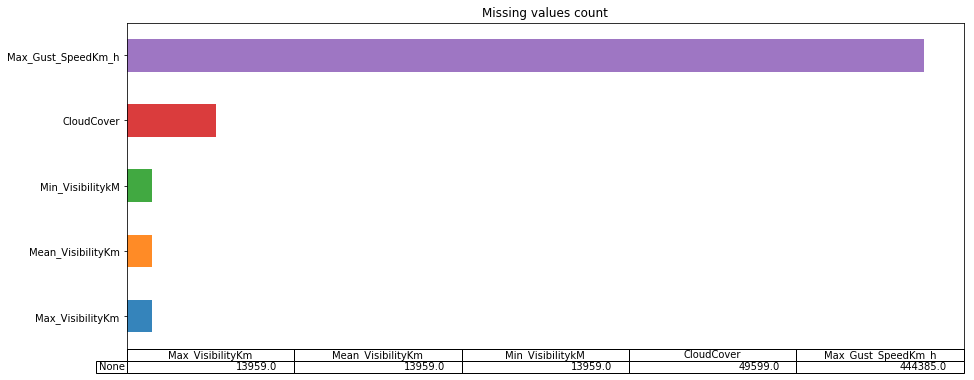

In [51]:
# Missing values
plt.figure(figsize=(15,6))
rows_length = numeric_features.shape[0]
numeric_nan_length = numeric_features.isna().sum().where(lambda x : x > 0).dropna()
numeric_nan_length = numeric_nan_length.sort_values()
ax = numeric_nan_length \
.plot(kind='barh', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels

## Data exploration

### Number of stores per region

In [52]:
all_data.groupby(['StoreType'])['HasPromotions'].count()
storeregions = all_data.groupby(['Region'])['StoreID'].unique()
total_stores = 0
store_dict = {}

for i in range(0,11):
    total_stores += len(storeregions[i])
    store_dict[i] = len(storeregions[i])

print('Total stores {} '.format(total_stores))
for i,k in store_dict.items():
    print('Region {} has {} stores ({:.2f}% of total)'
          .format(i, k, (k/total_stores)*100))

Total stores 749 
Region 0 has 55 stores (7.34% of total)
Region 1 has 24 stores (3.20% of total)
Region 2 has 89 stores (11.88% of total)
Region 3 has 125 stores (16.69% of total)
Region 4 has 92 stores (12.28% of total)
Region 5 has 18 stores (2.40% of total)
Region 6 has 51 stores (6.81% of total)
Region 7 has 62 stores (8.28% of total)
Region 8 has 169 stores (22.56% of total)
Region 9 has 36 stores (4.81% of total)
Region 10 has 28 stores (3.74% of total)


### Number of shops per shop type

In [53]:
storenames=all_data['StoreType'].unique()
shopping_center=all_data[all_data['StoreType']== 'Shopping Center']
storetype = all_data.groupby(['StoreType'])['StoreID'].unique()
for x in range(0,4):
    print("There are {} shops of type {}".format(len(storetype[x]),storenames[x]))

There are 417 shops of type Hyper Market
There are 218 shops of type Super Market
There are 105 shops of type Standard Market
There are 9 shops of type Shopping Center


## 3. Time - sales visualization

### Average monthly sales

In [54]:
avg_monthly_sales = monthly_sales_train.groupby(monthly_sales_train.Date.dt.month).NumberOfSales.mean()
avg_monthly_sales.plot(kind='bar',figsize=(12,6));

NameError: name 'monthly_sales_train' is not defined

### Average day of the week sales

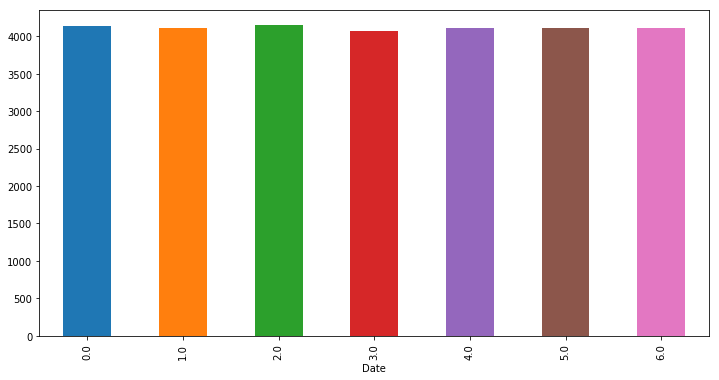

In [34]:
avg_day_sales = train.groupby(monthly_sales_train.Date.dt.dayofweek).NumberOfSales.mean()
avg_day_sales.plot(kind='bar',figsize=(12,6));

In [17]:
dic_train = {
    'IsHoliday':'mean',
    'IsOpen':'mean',
    'HasPromotions':'mean',
    'NearestCompetitor':'mean',
    'NumberOfCustomers':'sum',
    'NumberOfSales':'sum',
    'Region_AreaKM2':'mean',
    'Region_GDP':'mean',
    'Region_PopulationK':'mean',
    'CloudCover':'mean',
    'Max_Gust_SpeedKm_h':'mean',
    'Max_Humidity':'mean',
    'Max_Sea_Level_PressurehPa':'mean',
    'Max_TemperatureC':'mean',
    'Max_VisibilityKm':'mean',
    'Max_Wind_SpeedKm_h':'mean',
    'Mean_Dew_PointC':'mean',
    'Mean_Humidity':'mean',
    'Mean_Sea_Level_PressurehPa':'mean',
    'Mean_TemperatureC':'mean',
    'Mean_VisibilityKm':'mean',
    'Mean_Wind_SpeedKm_h':'mean',
    'Min_Dew_PointC':'mean',
    'Min_Humidity':'mean',
    'Min_Sea_Level_PressurehPa':'mean',
    'Min_TemperatureC':'mean',
    'Min_VisibilitykM':'mean',
    'Precipitationmm':'mean',
    'WindDirDegrees':'mean'}

dic_all = dic_train.copy()
del dic_all['NumberOfSales']
del dic_all['NumberOfCustomers']

monthly_sales_train = train.groupby(["Region", "StoreID", pd.Grouper(key = 'Date',freq='M')]).\
agg(dic_train).reset_index()

monthly_sales_all = all_data.groupby(["Region", "StoreID", pd.Grouper(key = 'Date',freq='M')]).\
agg(dic_all).reset_index()

monthly_sales_all.head()

Region  StoreID       Date  IsHoliday    IsOpen  HasPromotions  \
0      0     1001 2016-03-31   0.000000  0.866667       0.466667   
1      0     1001 2016-04-30   0.066667  0.333333       0.366667   
2      0     1001 2016-05-31   0.096774  0.741935       0.387097   
3      0     1001 2016-06-30   0.033333  0.866667       0.433333   
4      0     1001 2016-07-31   0.000000  0.838710       0.322581   

   NearestCompetitor  Region_AreaKM2  Region_GDP  Region_PopulationK  \
0              16755            8410       10494                1892   
1              16755            8410       10494                1892   
2              16755            8410       10494                1892   
3              16755            8410       10494                1892   
4              16755            8410       10494                1892   

   CloudCover  Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0    6.461538           52.200001     91.866667                1016.333333   
1    6.464286           44.000000     88.066667                1018.233333   
2    5.833333           44.125000     92.870968                1014.709677   
3    5.285714           42.222221     94.700000                1017.233333   
4    4.482759           26.000000     89.258065                1021.322581   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0          1.733333         21.133333           24.533333        -4.633333   
1         11.466667         26.000000           21.966667         2.233333   
2         16.322581         25.266666           22.290323         8.064516   
3         20.400000         25.500000           21.100000        12.066667   
4         24.774194         28.321428           17.645161        12.161290   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0      76.266667                 1012.066667          -1.066667   
1      67.800000                 1014.300000           7.833333   
2      74.096774                 1011.580645          12.516129   
3      76.533333                 1014.466667          16.033333   
4      62.516129                 1019.516129          19.258065   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0          12.033334            14.400000       -6.900000     53.766667   
1          13.206897            11.900000       -0.266667     41.733333   
2          11.333333            11.290323        5.774194     47.677419   
3          11.600000            11.100000        9.300000     53.366667   
4          15.071428             9.258065        9.774194     34.870968   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                1008.833333         -3.900000          6.266667   
1                1011.200000          4.066667          7.137931   
2                1009.064516          8.903226          6.533333   
3                1011.933333         11.700000          6.166667   
4                1017.483871         13.774194          9.250000   

   Precipitationmm  WindDirDegrees  
0         0.236667      167.800000  
1         0.449000      201.166667  
2         1.523226      178.935484  
3         5.452667      199.200000  
4         0.130968      218.967742

### Monthly data grouped by Region and Store

#### Sales per month for each region

In [55]:
for regionID, region in monthly_sales_train.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['NumberOfSales'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o',legend=True)
    plt.show()

NameError: name 'monthly_sales_train' is not defined

#### Percentage of days a store is open for each region

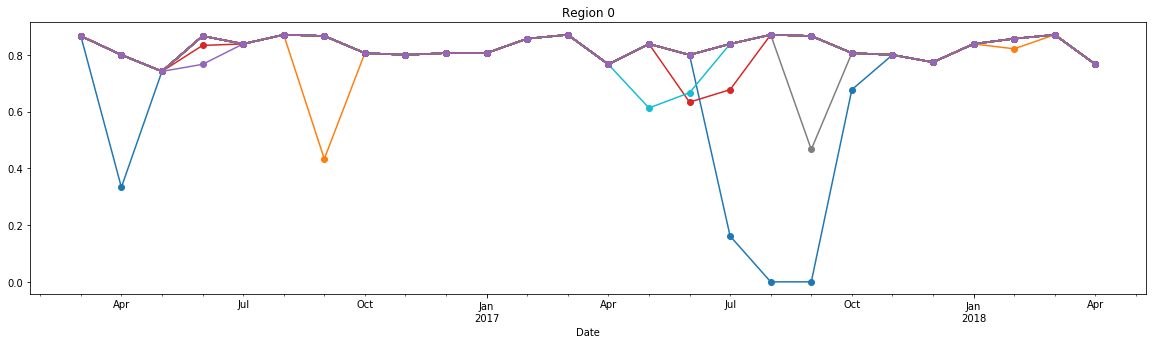

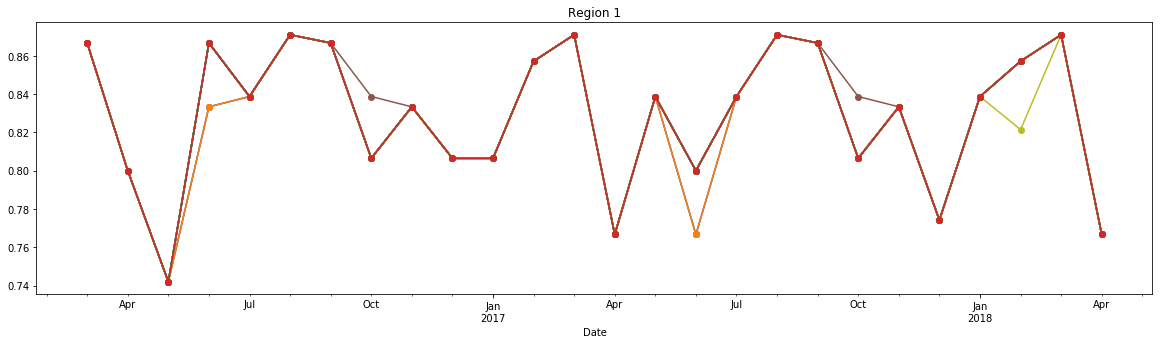

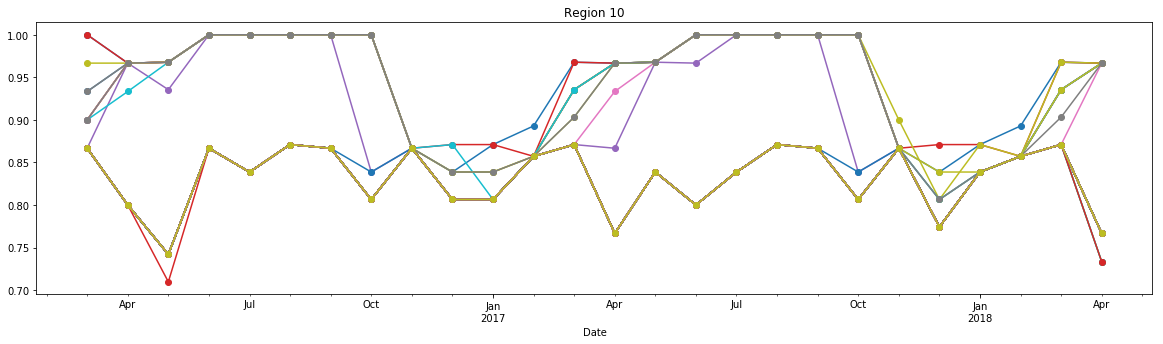

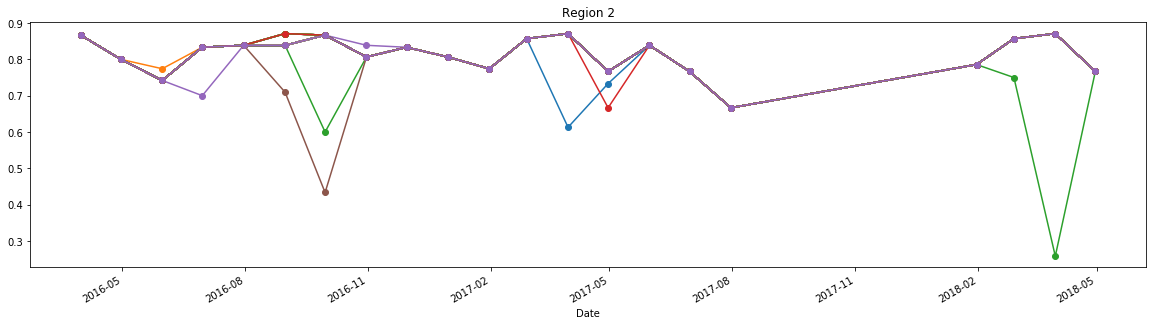

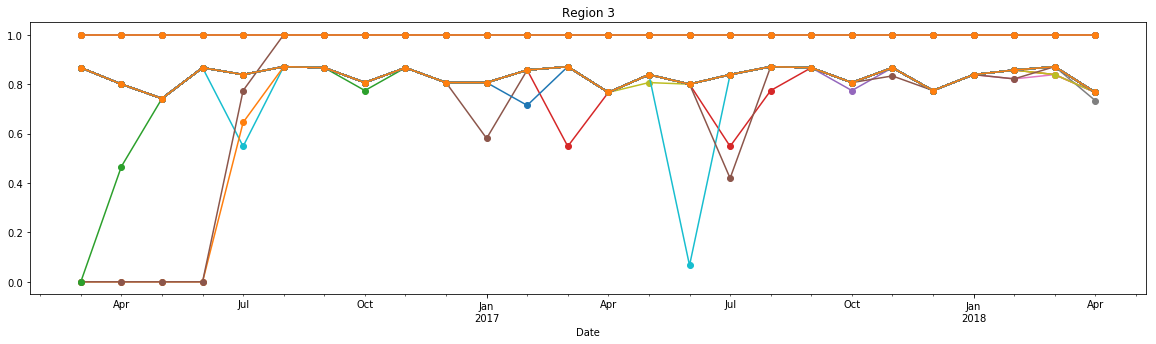

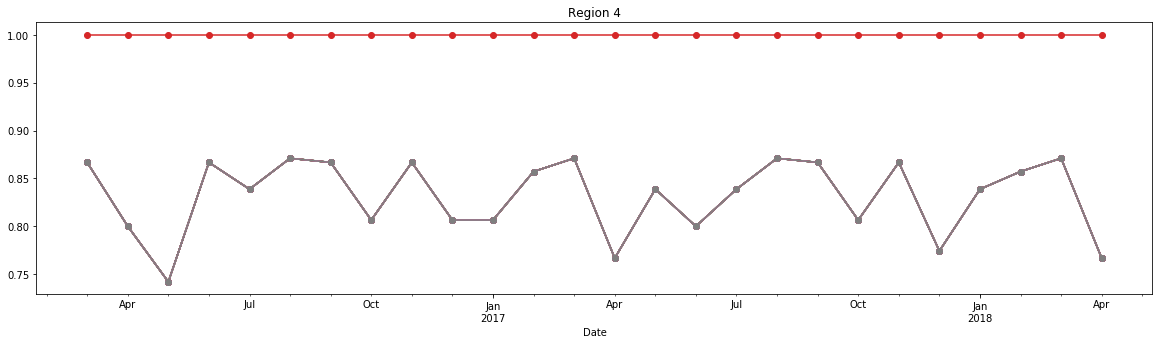

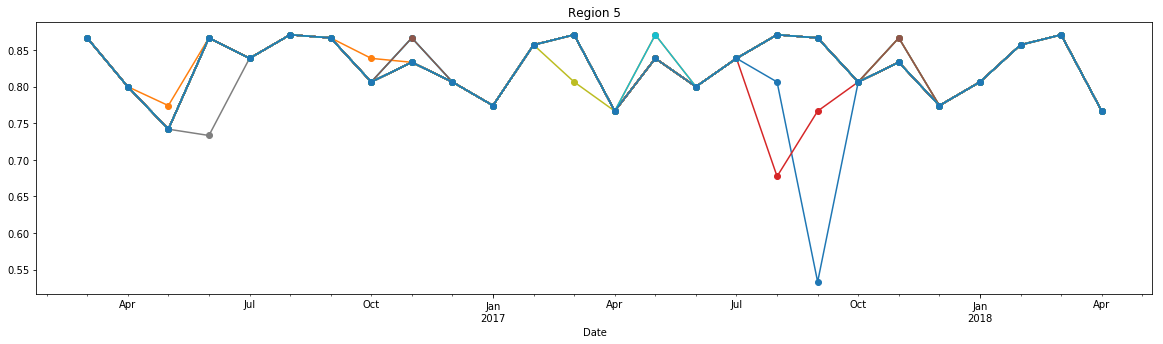

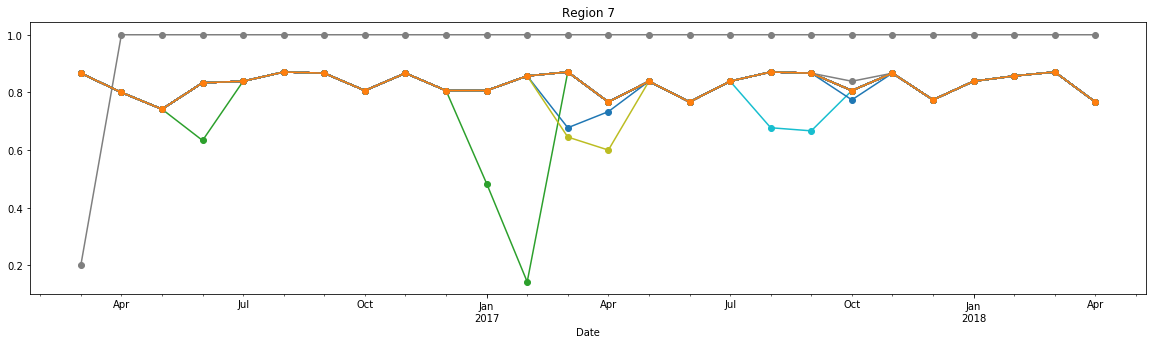

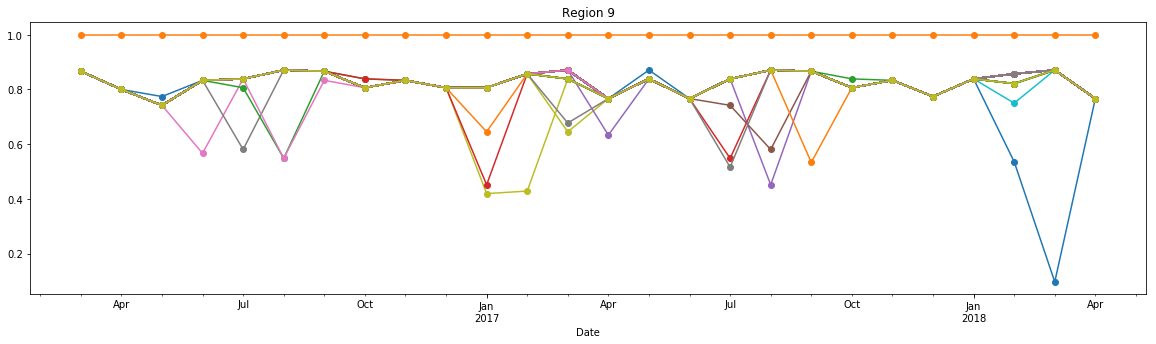

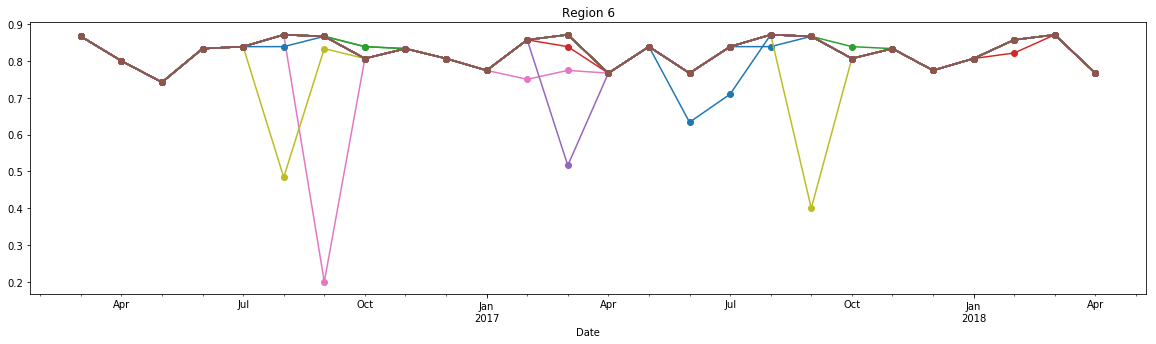

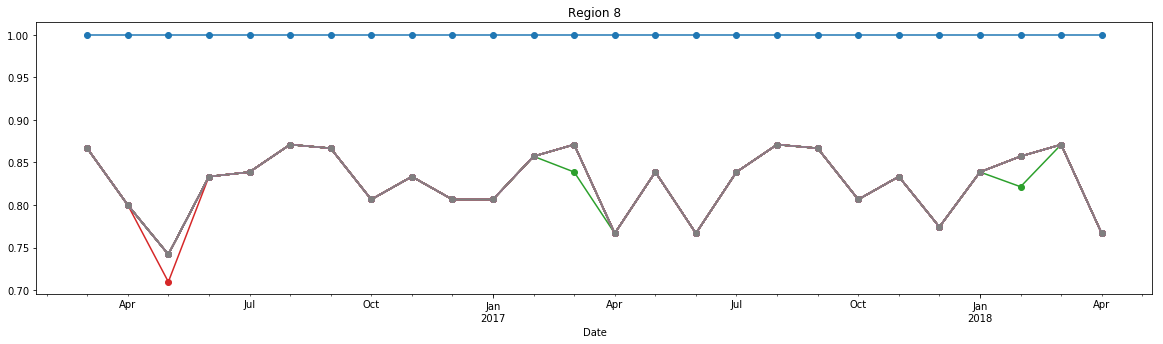

In [19]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['IsOpen'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

### Monthly data grouped by Region 

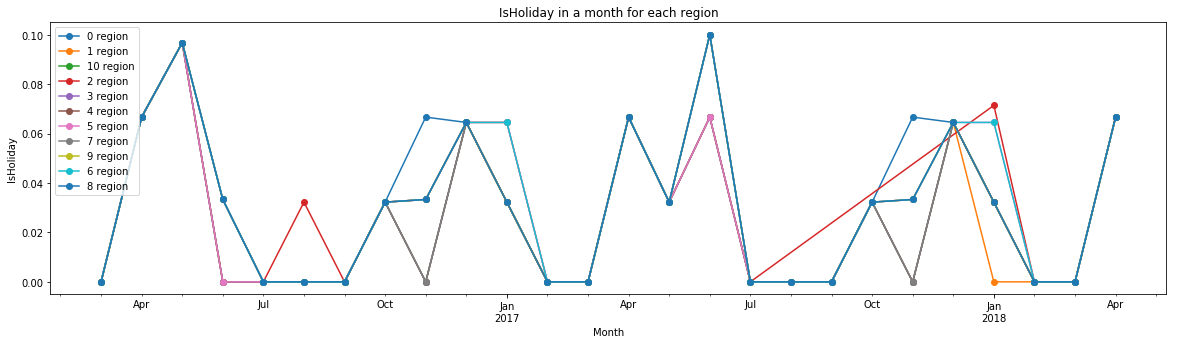

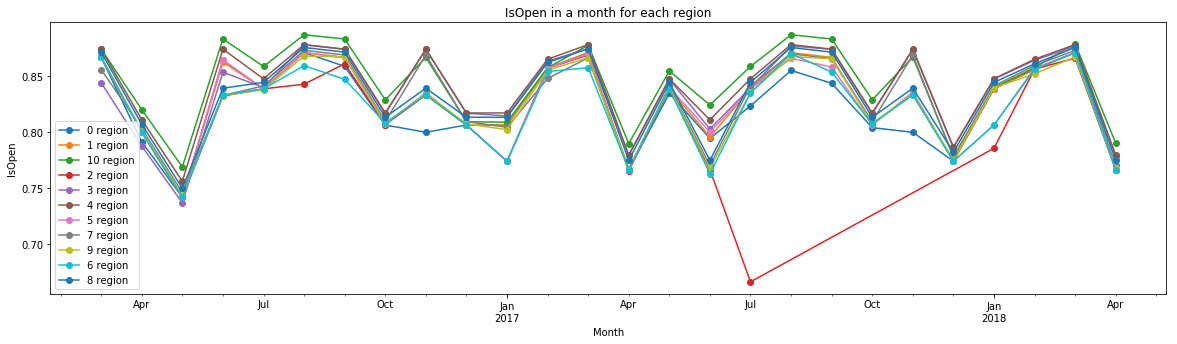

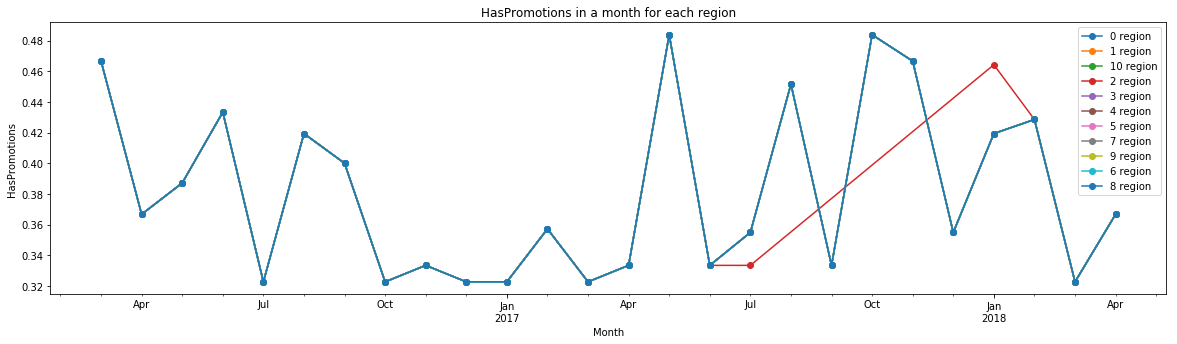

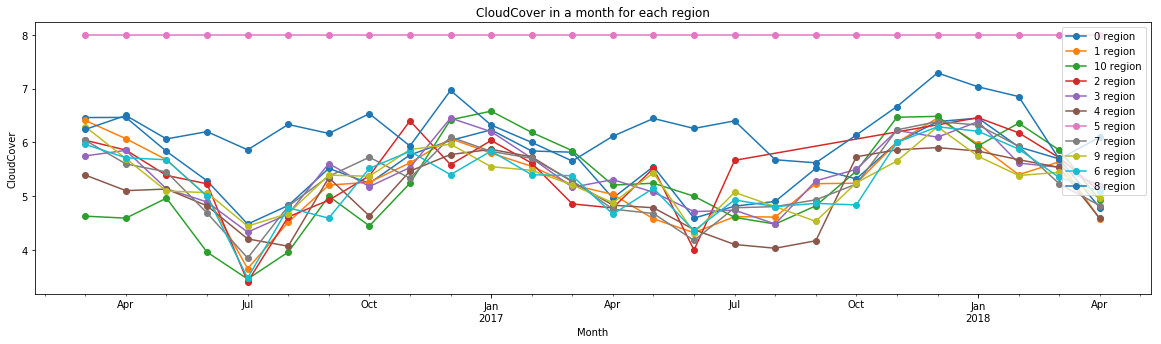

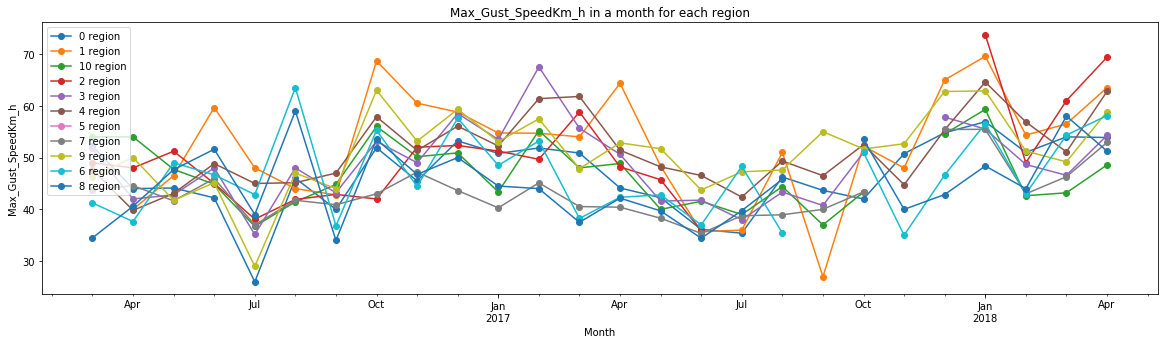

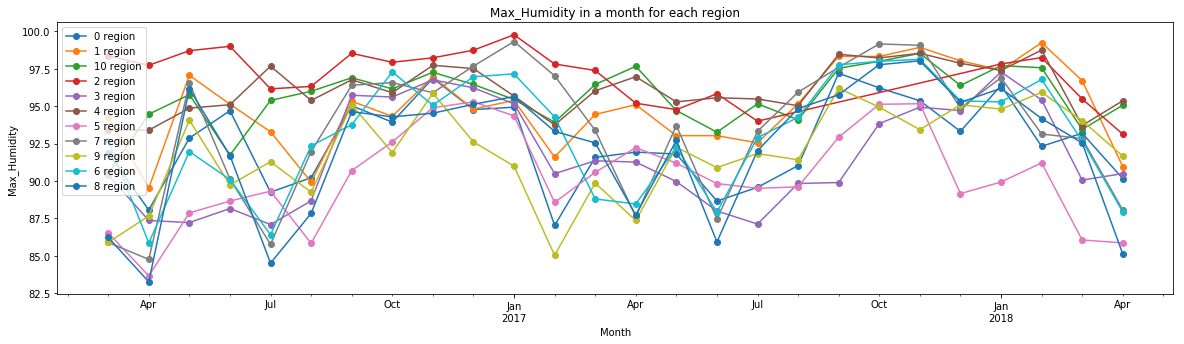

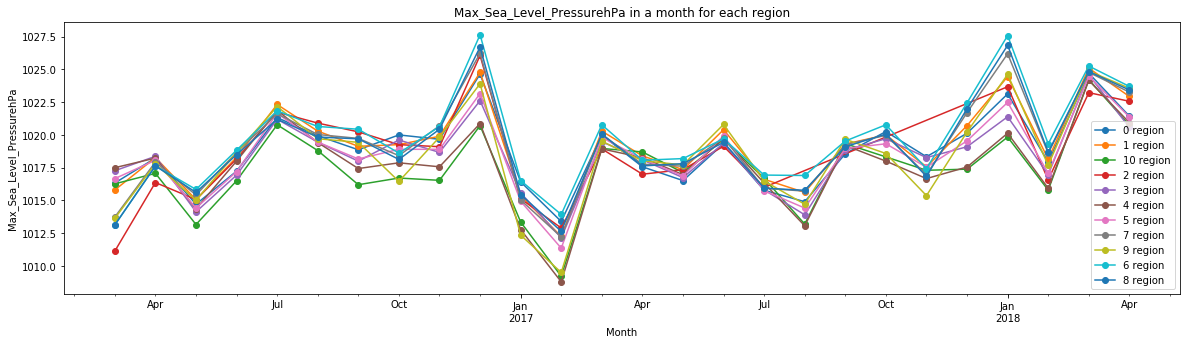

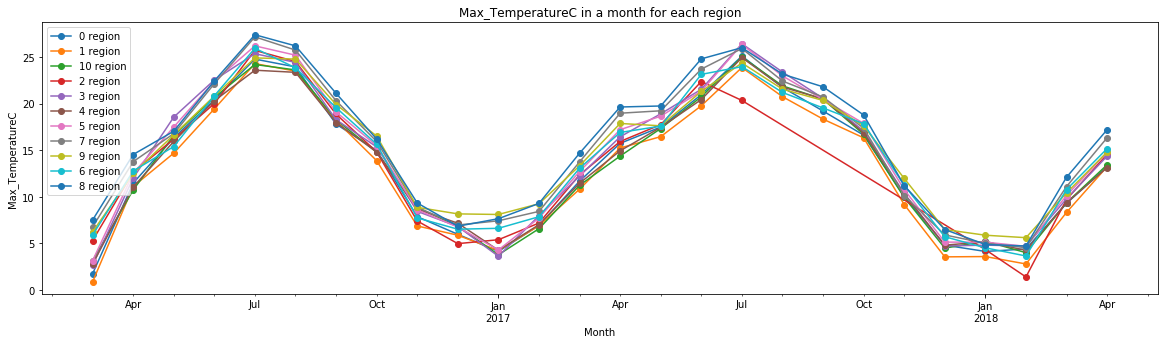

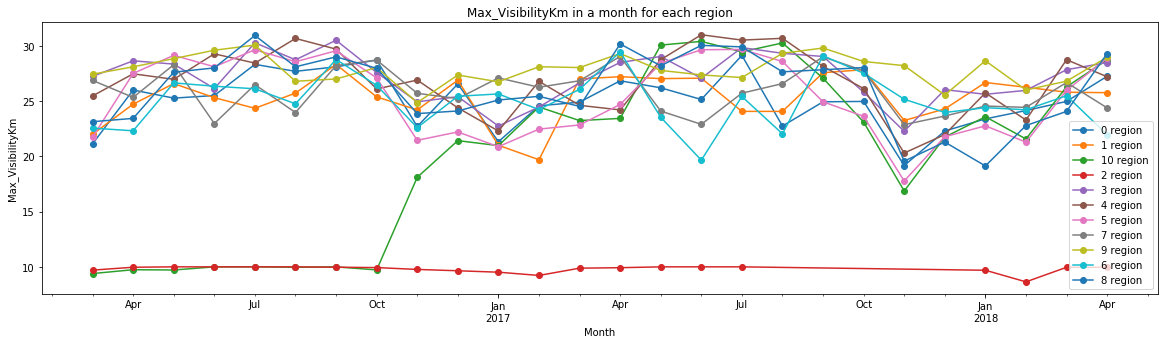

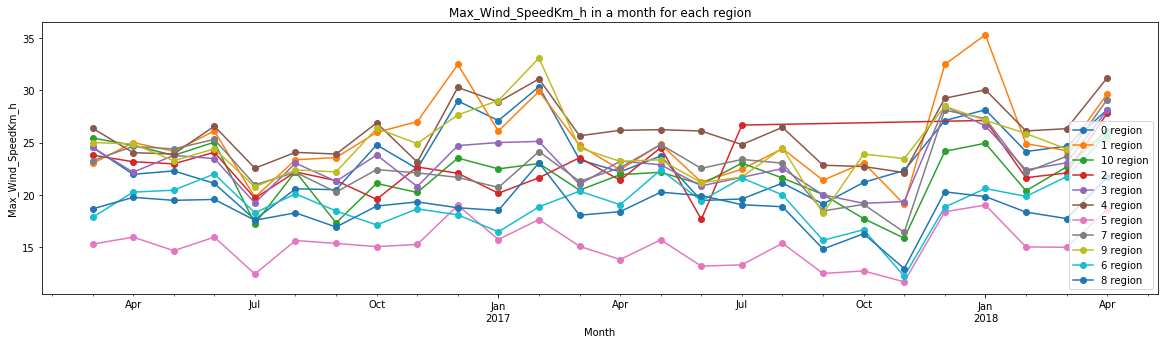

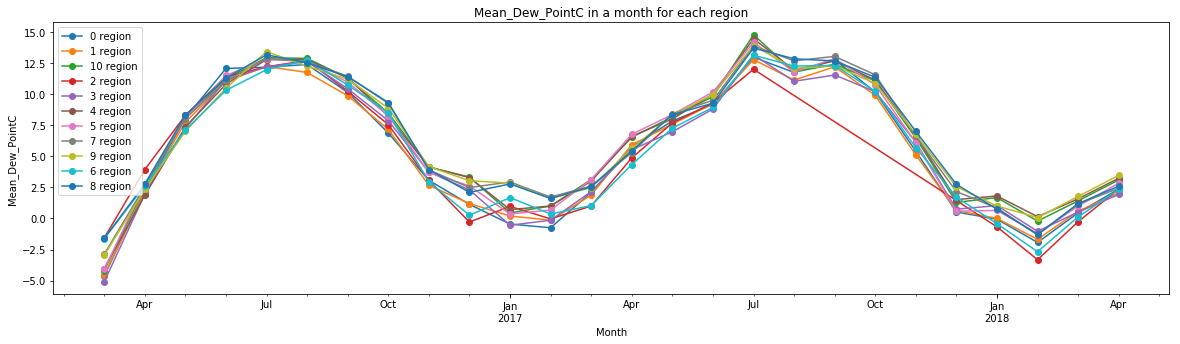

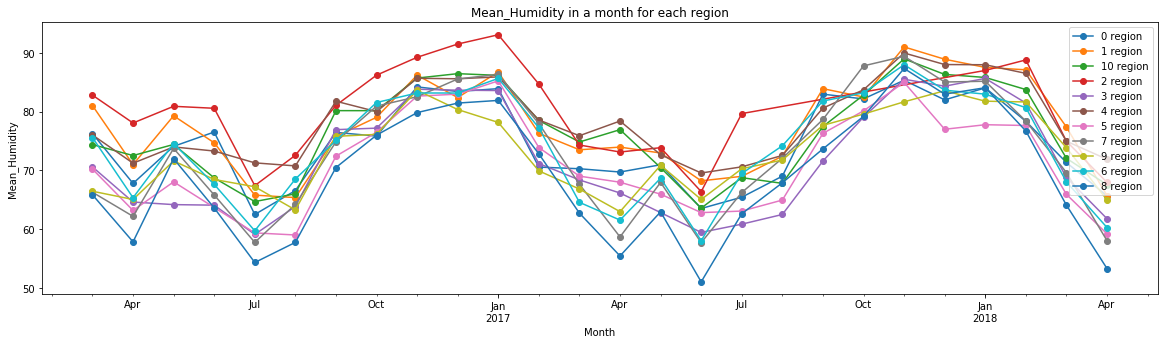

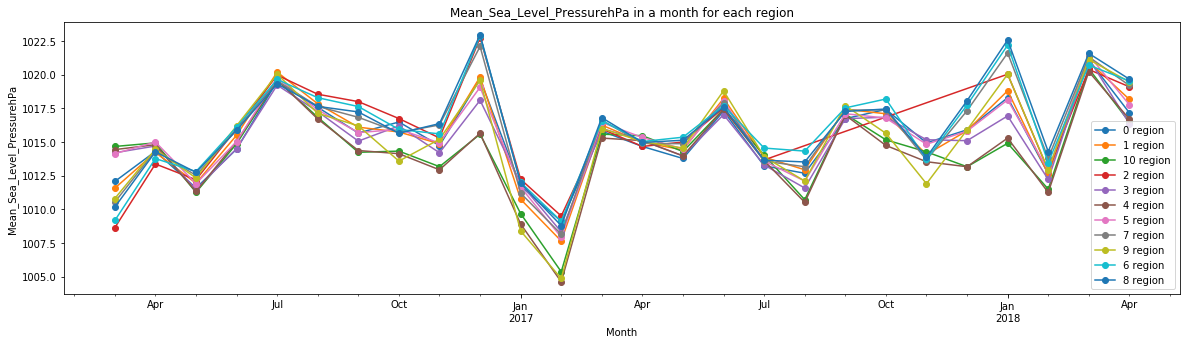

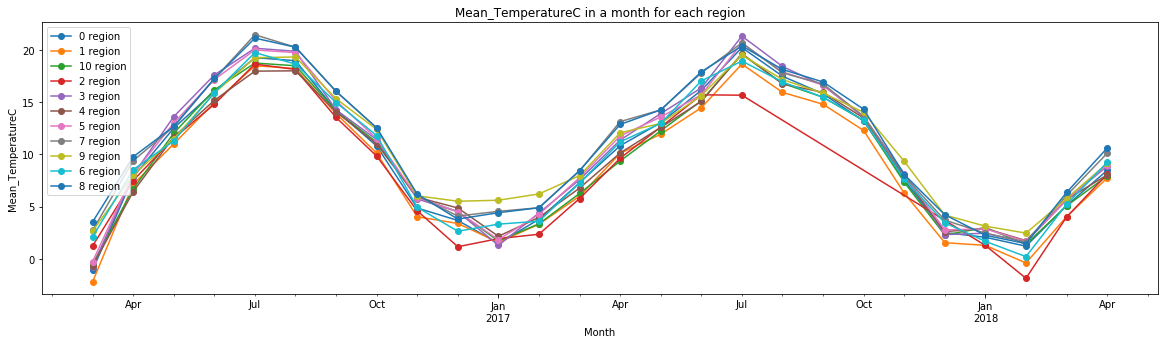

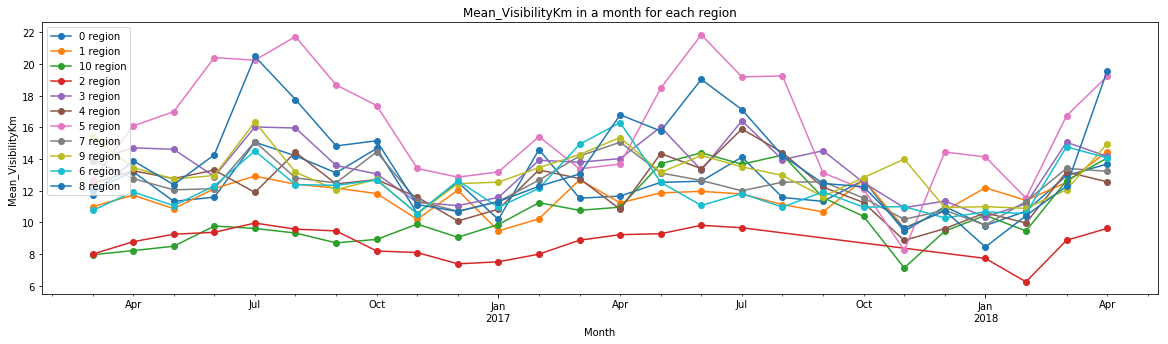

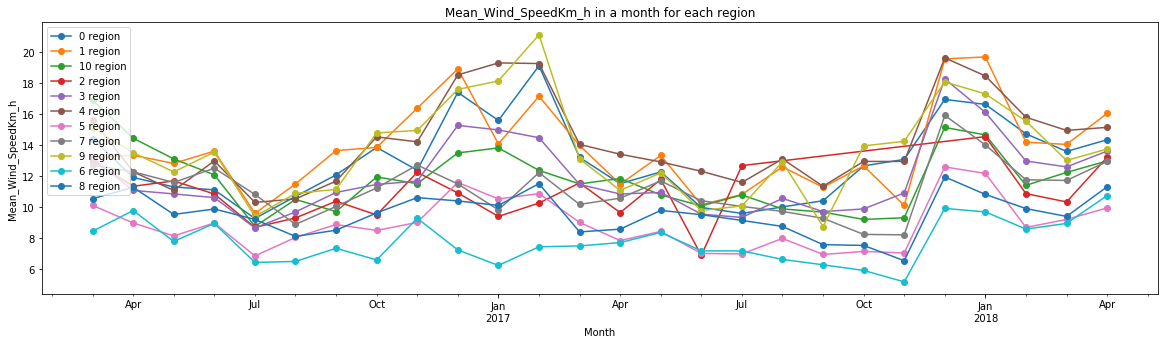

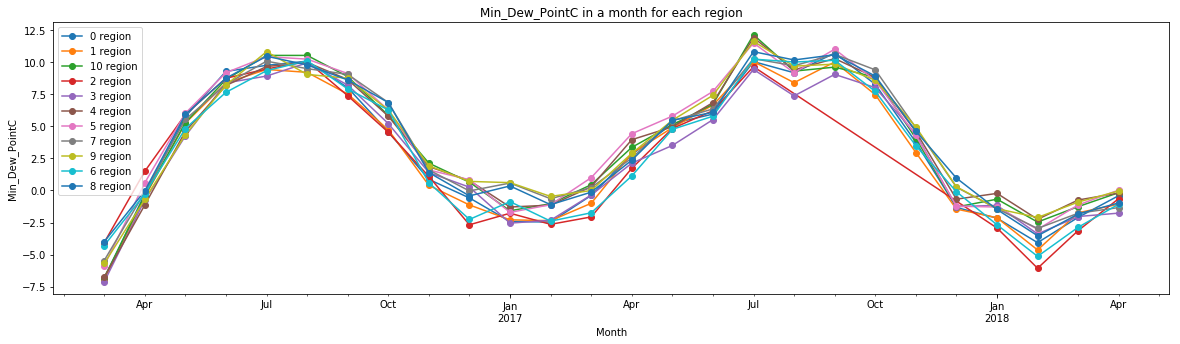

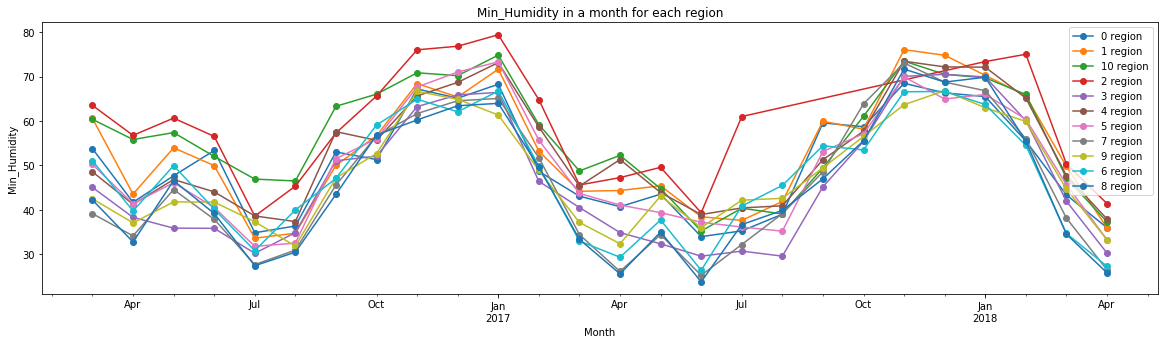

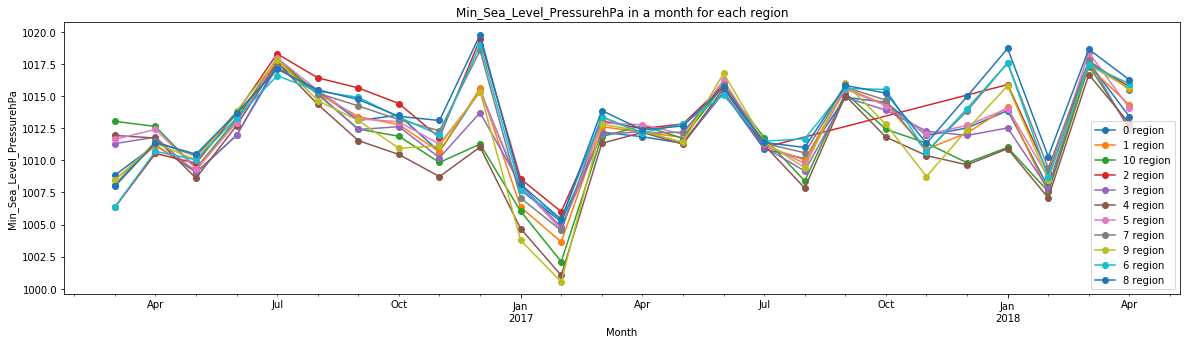

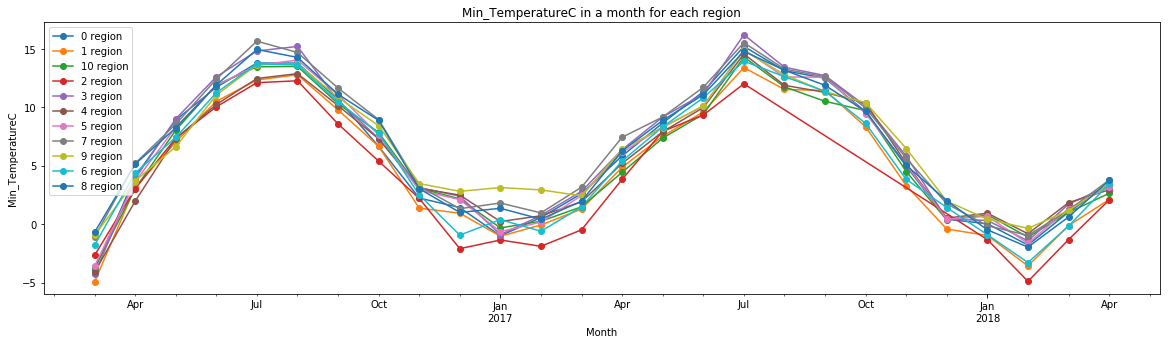

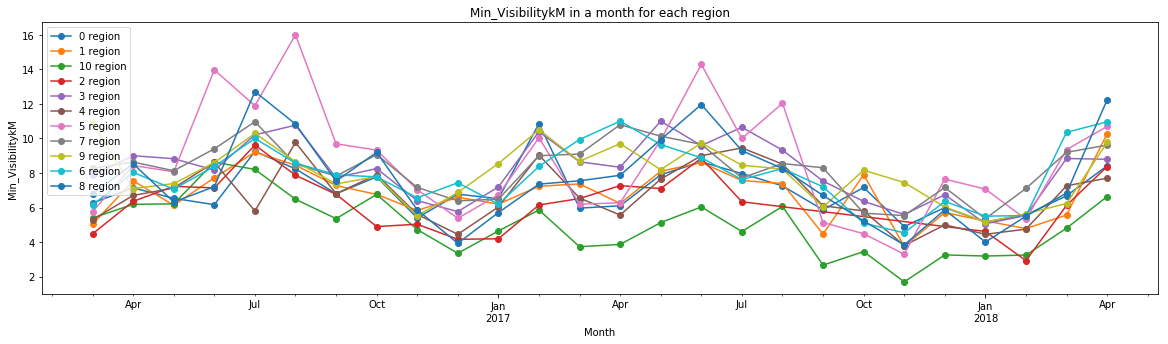

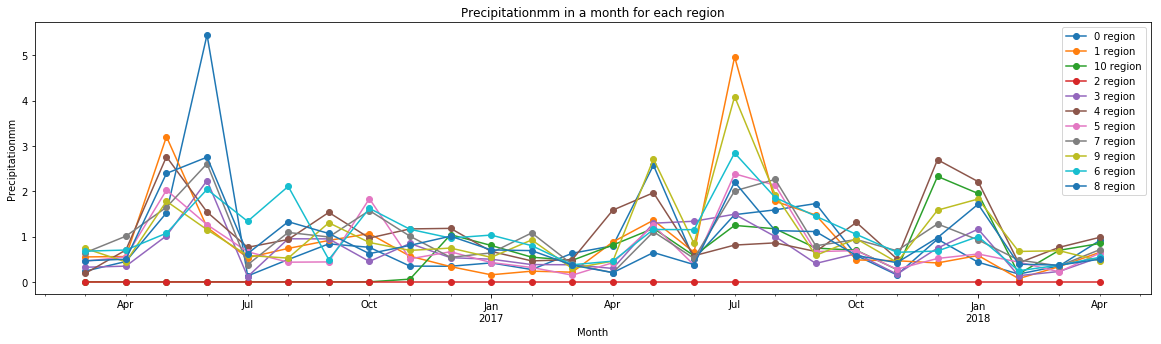

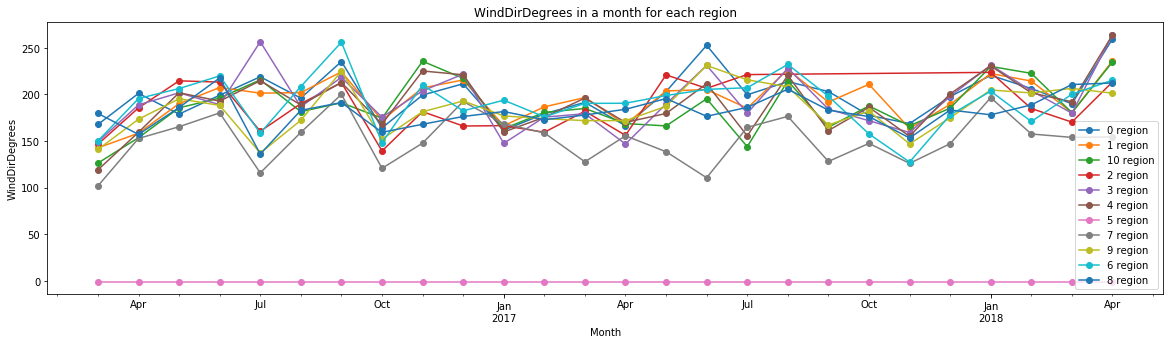

In [20]:
# Define all_data grouped by Region
all_data_byRegion = all_data.groupby(["Region", pd.Grouper(key = 'Date', freq='M')])\
.agg(dic_all).reset_index()

# Define legend
legend = []
for regionID, region in all_data_byRegion.groupby('Region'):
    legend.append(regionID+' region')
    
# Define columns
columns = list(all_data_byRegion
               .drop(['Region', 'Date', 'NearestCompetitor', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK'], axis=1).columns)

for i in columns:
    for regionID, region in all_data_byRegion.groupby('Region'):
        pd.Series(region[i].values, index=region['Date']).\
        plot(figsize=(20,5), marker='o')

    plt.legend(legend)
    plt.title('{} in a month for each region'.format(i))
    plt.xlabel('Month')
    plt.ylabel(i)
    plt.show()

* *Region 2* has **missing values** in range 2017-07/2018-01 for all the considered features
* *HasPromotions* is **identical** for each region. *Region 2* missing values can be probably inferred from it (simple data copy)
* *IsOpen*, *Max_Sea_Level_PressurehPa*, *Max_TemperatureC*, *Max_Dew_PointC*, *Mean_Sea_Level_PressurehPa*, *Mean_TemperatureC*, *Mean_Dew_PointC**, *Min_Sea_Level_PressurehPa*, *Min_TemperatureC* is **almost identical** for each region. *Region 2* missing values can be probably inferred from it (regression or some sort of median of other region's values)
* *Mean_Humidity*, *Min_Humidity*  have an **almost identical trend** for each region. *Region 2* missing values can be probably inferred from it (regression or some sort of median of other region's values)
* *Max_VisibilityKm* has anomalies for *Region 2* and *Region 10*
    * *Region 2* is almost flat with very low visibility, probably to be considered entirely as missing values
    * *Region 10* is almost flat with very low visibility at the beginning in range 2016-03/2017-10. Missing values end at 2017-11 starting again with a credible trend in line with the other regions
* *Precipitationmm* has high peaks in summer and spring. *Region 2* is flat on 0, to be considered entirely as missing values
* *WindDirDegrees* is flat on 0 for *Region 5*, to be considered entirely as missing values

## Meteo data

Meteo features available:

| Feature | Max | Mean | Min | HasMissing |
| ------ |:------:|:------:|:------:|:------:|
| *Gust_SpeedKm_h* | x | - | - | x |
| *Dew_PointC* | - | - | x | - |
| *Wind_SpeedKm_h* | x | x | - | - |
| *Humidity* | x | x | x | - |
| *Sea_Level_PressurehPa* | x | x | x | - |
| *TemperatureC* | x | x | x | - |
| *VisibilityKm* | x | x | x | x |
| *Precipitationmm* | - | - | - | - |
| *WindDirDegrees* | - | - | - | - |
| *CloudCover* | - | - | - | x |

In [21]:
# List meteo features with their declinations for iterations
meteo_features = {
    'Gust_SpeedKm_h': ['Max'],
    'Dew_PointC': ['Mean', 'Min'],
    'Wind_SpeedKm_h': ['Max', 'Mean'],
    'Humidity': ['Max', 'Mean', 'Min'],
    'Sea_Level_PressurehPa': ['Max', 'Mean', 'Min'],
    'TemperatureC': ['Max', 'Mean', 'Min'],
    'VisibilityKm': ['Max', 'Mean', 'Min'],
    'Precipitationmm': [''],
    'WindDirDegrees': [''],
    'CloudCover': ['']
}

# Create a copy of the all_data dataframe, rename conflictual column names
all_data_scaled = all_data.copy()
all_data_scaled = all_data_scaled.rename(columns={'Min_VisibilitykM': 'Min_VisibilityKm'})
dic_all_scaled = dic_all.copy()
dic_all_scaled['Min_VisibilityKm'] = dic_all_scaled.pop('Min_VisibilitykM')

# Normalize all meteo values for comparisons and fill NaN with zeros (just for visualization)
min_max_scaler = preprocessing.MinMaxScaler()
for feature_name, feature in meteo_features.items():
    for i in feature:
        f = feature_name if i == '' else i+'_'+feature_name
        all_data_scaled[f] =\
            min_max_scaler.fit_transform(all_data_scaled[[f]].fillna(0).values.astype(float))

# Group by date in a monthly fashion
all_data_scaled_byDate = all_data_scaled.groupby([pd.Grouper(key = 'Date', freq='M')])\
.agg(dic_all_scaled).reset_index()

all_data_scaled_byDate.head()

Date  IsHoliday    IsOpen  HasPromotions  NearestCompetitor  \
0 2016-03-31   0.000000  0.864441       0.466667        7958.004005   
1 2016-04-30   0.066667  0.801335       0.366667        7958.004005   
2 2016-05-31   0.096774  0.746027       0.387097        7958.004005   
3 2016-06-30   0.021139  0.847886       0.433333        7958.004005   
4 2016-07-31   0.000000  0.841681       0.322581        7958.004005   

   Region_AreaKM2    Region_GDP  Region_PopulationK  CloudCover  \
0    13216.973298  14140.499332         3940.098798    0.638156   
1    13216.973298  14140.499332         3940.098798    0.690376   
2    13216.973298  14140.499332         3940.098798    0.664171   
3    13216.973298  14140.499332         3940.098798    0.600006   
4    13216.973298  14140.499332         3940.098798    0.448054   

   Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0            0.072485      0.827657                   0.574746   
1            0.097036      0.813954                   0.621125   
2            0.099804      0.892719                   0.577745   
3            0.115321      0.857918                   0.625101   
4            0.066817      0.840452                   0.680776   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0          0.323954          0.661915            0.207600         0.334470   
1          0.485179          0.689398            0.203772         0.503638   
2          0.577373          0.718759            0.199397         0.648831   
3          0.667924          0.706284            0.207892         0.745207   
4          0.757611          0.715050            0.163006         0.791258   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0       0.610263                    0.570047           0.323959   
1       0.542716                    0.611249           0.486341   
2       0.616614                    0.575864           0.584208   
3       0.573233                    0.628789           0.678125   
4       0.478771                    0.692776           0.755230   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0           0.379461             0.227187        0.340256      0.463559   
1           0.381280             0.198515        0.497436      0.385050   
2           0.372563             0.183315        0.643129      0.436012   
3           0.388448             0.188301        0.737256      0.405686   
4           0.433835             0.135557        0.778374      0.301105   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Precipitationmm  \
0                   0.576040          0.317262         0.006441   
1                   0.609699          0.479680         0.006499   
2                   0.583081          0.583865         0.020736   
3                   0.635263          0.676574         0.025672   
4                   0.701373          0.734803         0.006011   

   WindDirDegrees  Min_VisibilityKm  
0        0.367577          0.227565  
1        0.454611          0.231233  
2        0.505063          0.230605  
3        0.512704          0.266368  
4        0.459305          0.298436

### All meteo data compared

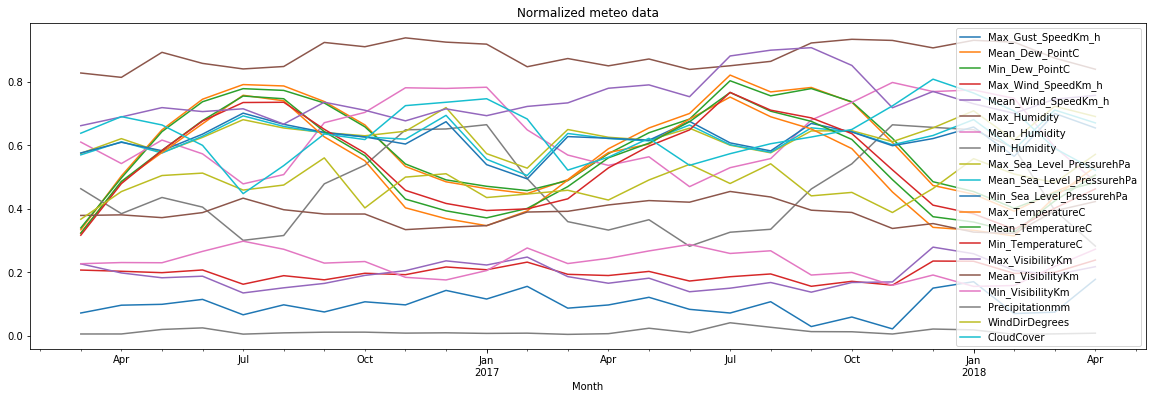

In [22]:
legend = []
for feature_name, feature in meteo_features.items():
    for i in feature:
        f = feature_name if i == '' else i+'_'+feature_name
        legend.append(f)
        pd.Series(all_data_scaled_byDate[f].values, index=all_data_scaled_byDate['Date'])\
        .plot(figsize=(20,6))

plt.legend(legend)
plt.title('Normalized meteo data')
plt.xlabel('Month')
plt.show()

### All mean meteo data compared

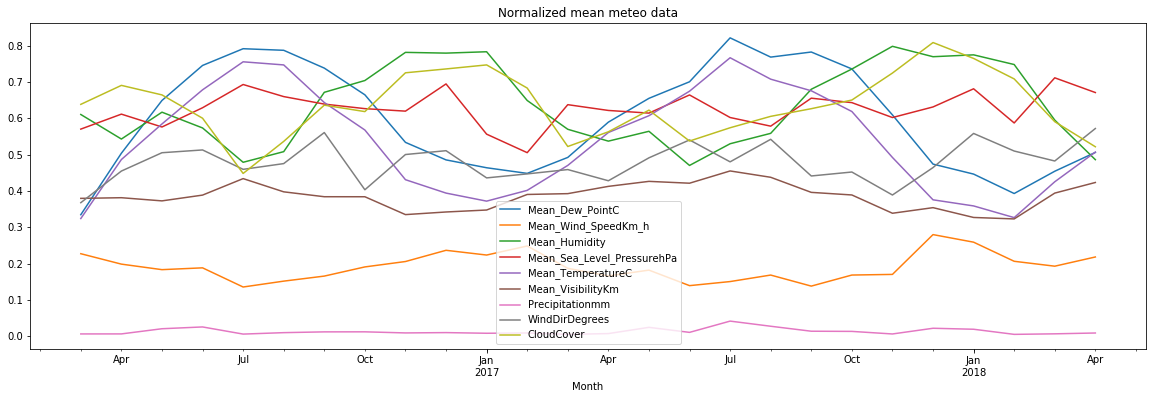

In [23]:
legend = []
for feature_name, feature in meteo_features.items():
    feature = [x for x in feature if x not in ['Max', 'Min']]
    for i in feature:
        f = feature_name if i == '' else i+'_'+feature_name
        legend.append(f)
        pd.Series(all_data_scaled_byDate[f].values, index=all_data_scaled_byDate['Date'])\
        .plot(figsize=(20,6))

plt.legend(legend)
plt.title('Normalized mean meteo data')
plt.xlabel('Month')
plt.show()

* *Mean_Dew_PointC*, *Mean_TemperatureC*, *Mean_Humidity*, *CloudCover* have an almost **sinusoidal trend**
* *Mean_Dew_PointC* and *Mean_TemperatureC* have the **same trend**. Peaks in Summer as expected. Possible to extract one **common feature**
* *Mean_Humidity* and *CloudCover* have an **opposite seasonality** wrt *Mean_Dew_PointC* and *Mean_TemperatureC* (plot and correlation follow)

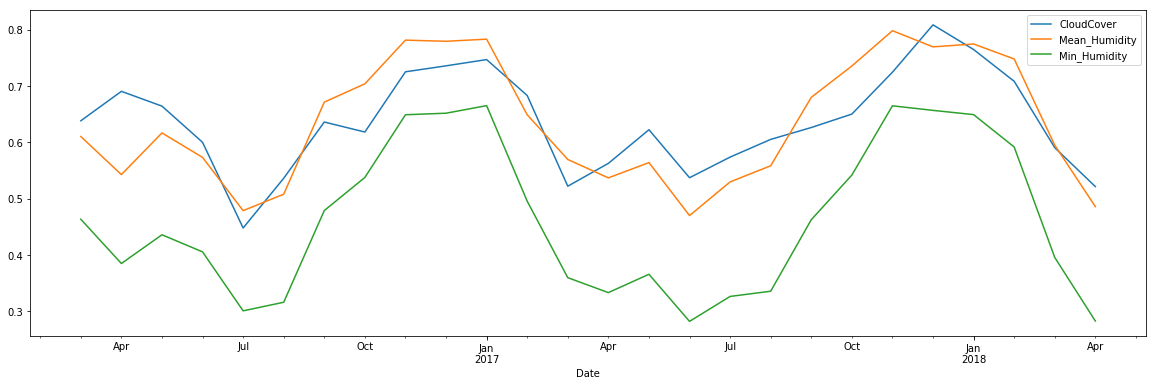

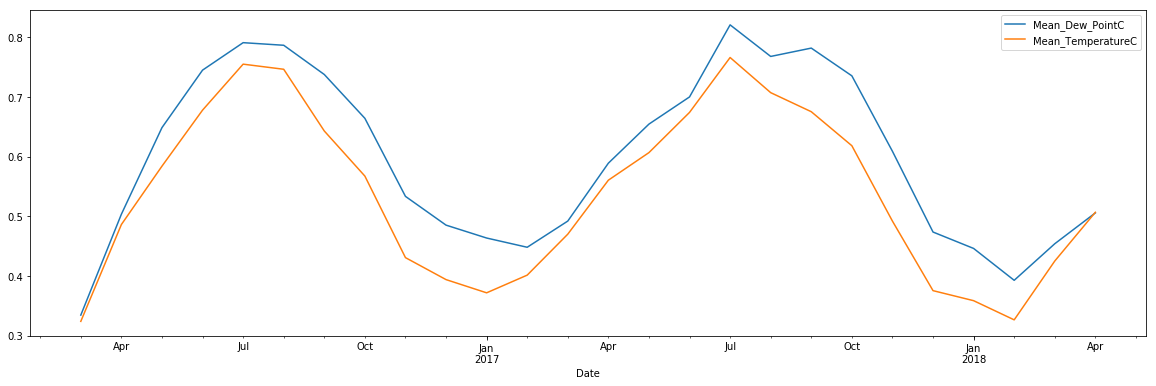

In [24]:
meteo_Feature_sin = [['CloudCover', 'Mean_Humidity', 'Min_Humidity'],
                     ['Mean_Dew_PointC', 'Mean_TemperatureC']]

for feature_list in meteo_Feature_sin:
    for i in feature_list:
        pd.Series(all_data_scaled_byDate[i].values, index=all_data_scaled_byDate['Date'])\
        .plot(figsize=(20,6))
    plt.legend(feature_list)
    plt.show()

### Plot all meteo data individually (not scaled)

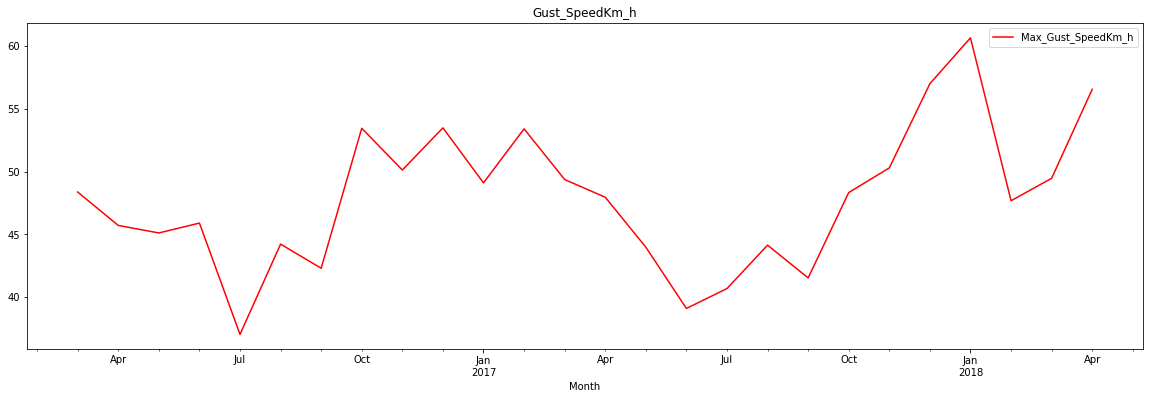

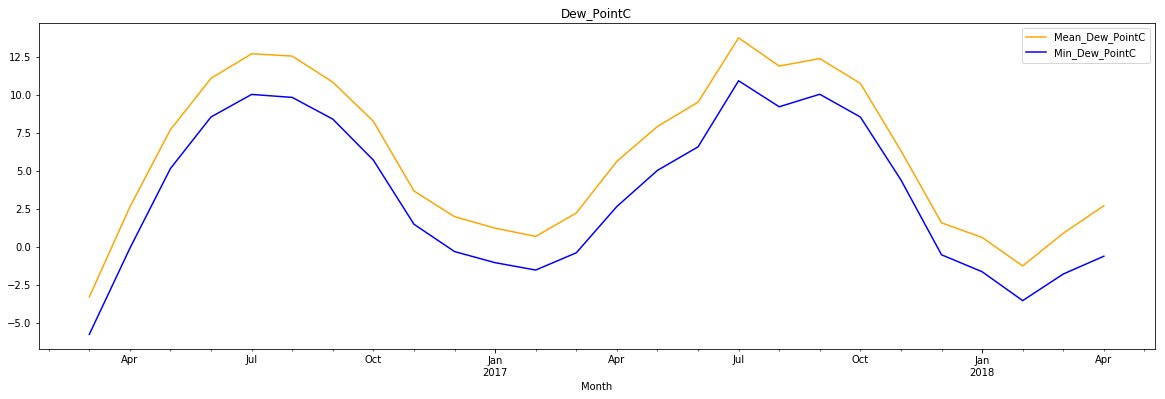

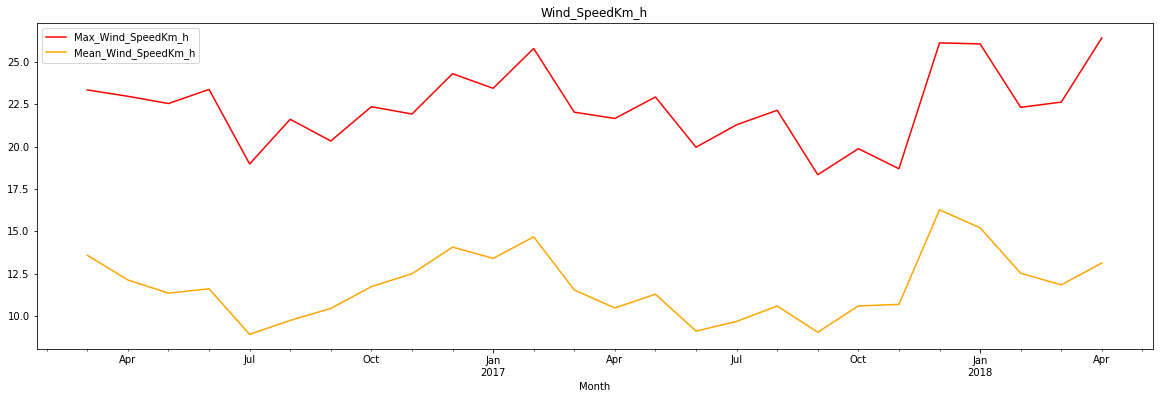

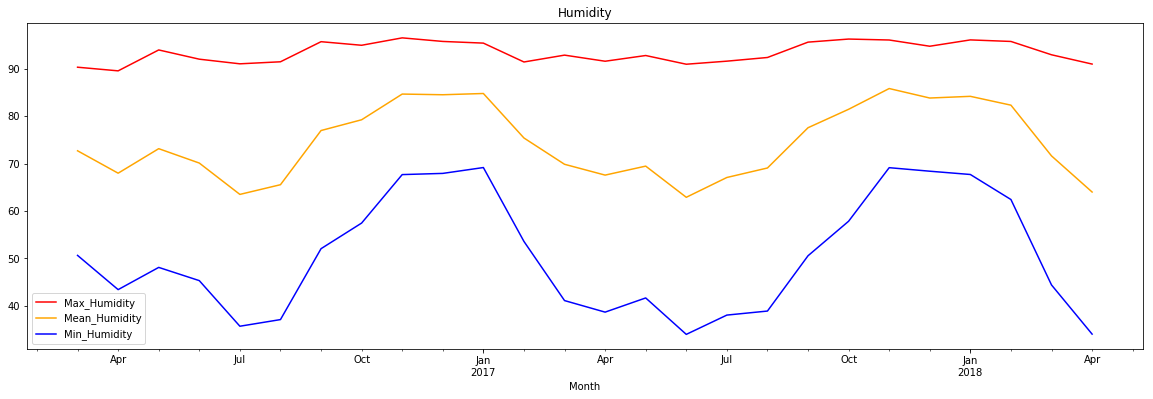

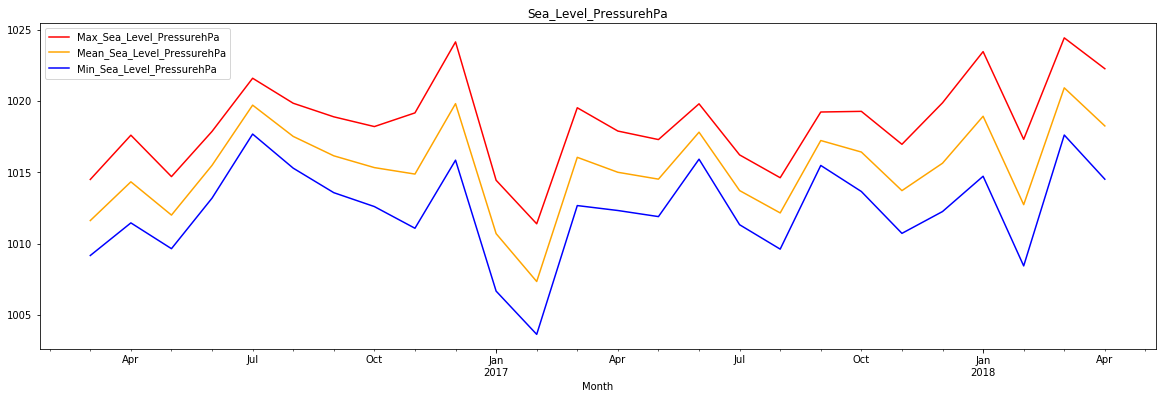

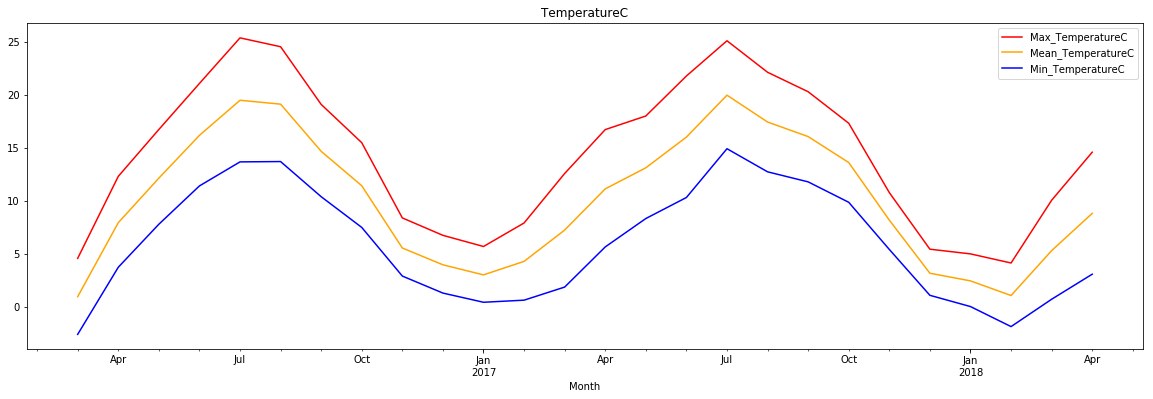

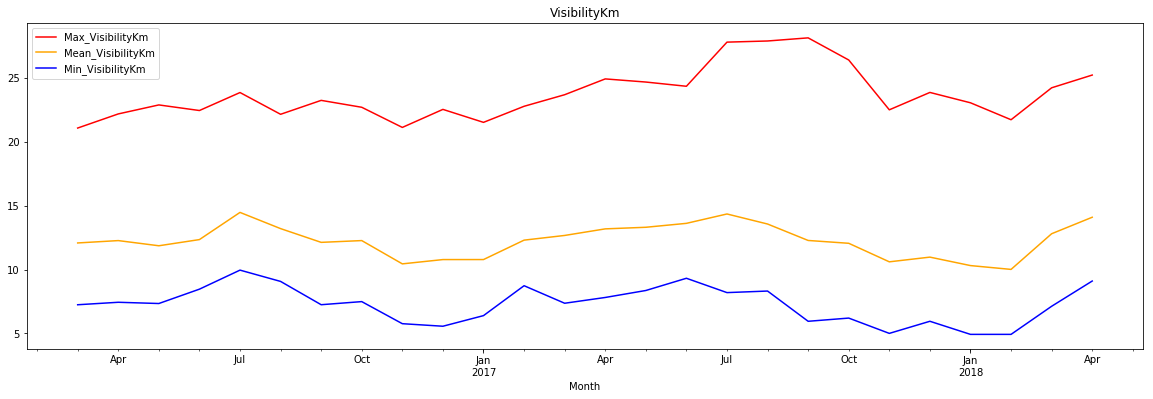

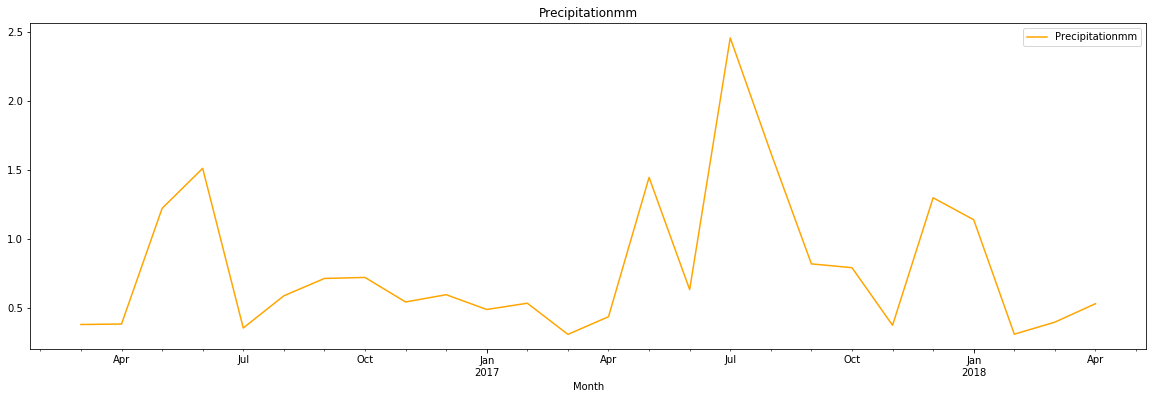

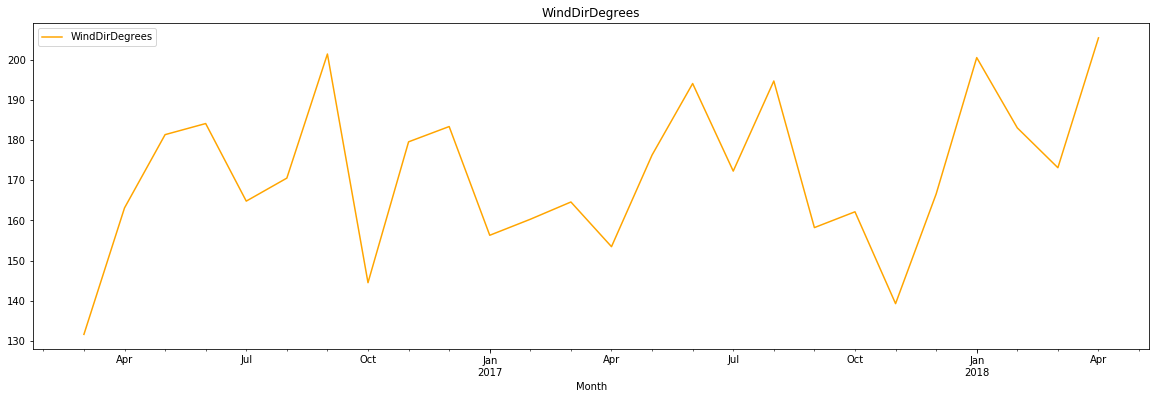

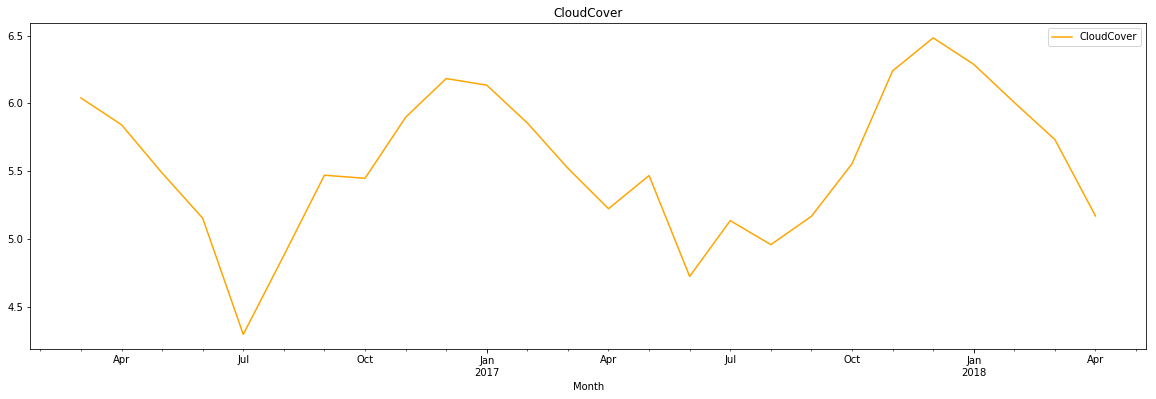

In [25]:
all_data_byDate = all_data.rename(columns={'Min_VisibilitykM': 'Min_VisibilityKm'})\
.groupby([pd.Grouper(key = 'Date', freq='M')]).agg(dic_all_scaled).reset_index()

for feature_name, feature in meteo_features.items():
    legend = []
    for i in feature:
        # legend
        f = feature_name if i == '' else i+'_'+feature_name
        legend.append(f)
        
        # line color
        if i == 'Max':
            c = 'red'
        elif i == 'Min':
            c = 'blue'
        else:
            c = 'orange'
        
        pd.Series(all_data_byDate[f].values, index=all_data_byDate['Date'])\
        .plot(figsize=(20,6), color=c)
        
    plt.legend(legend)
    plt.title(feature_name)
    plt.xlabel('Month')
    plt.show()

### Meteo data correlation

In [26]:
# Get all meteo features
meteo_features_columns = []
for feature_name, feature in meteo_features.items():
    for i in feature:
        meteo_features_columns\
        .append(feature_name if i == '' else i+'_'+feature_name)

#### Correlation of all meteo features

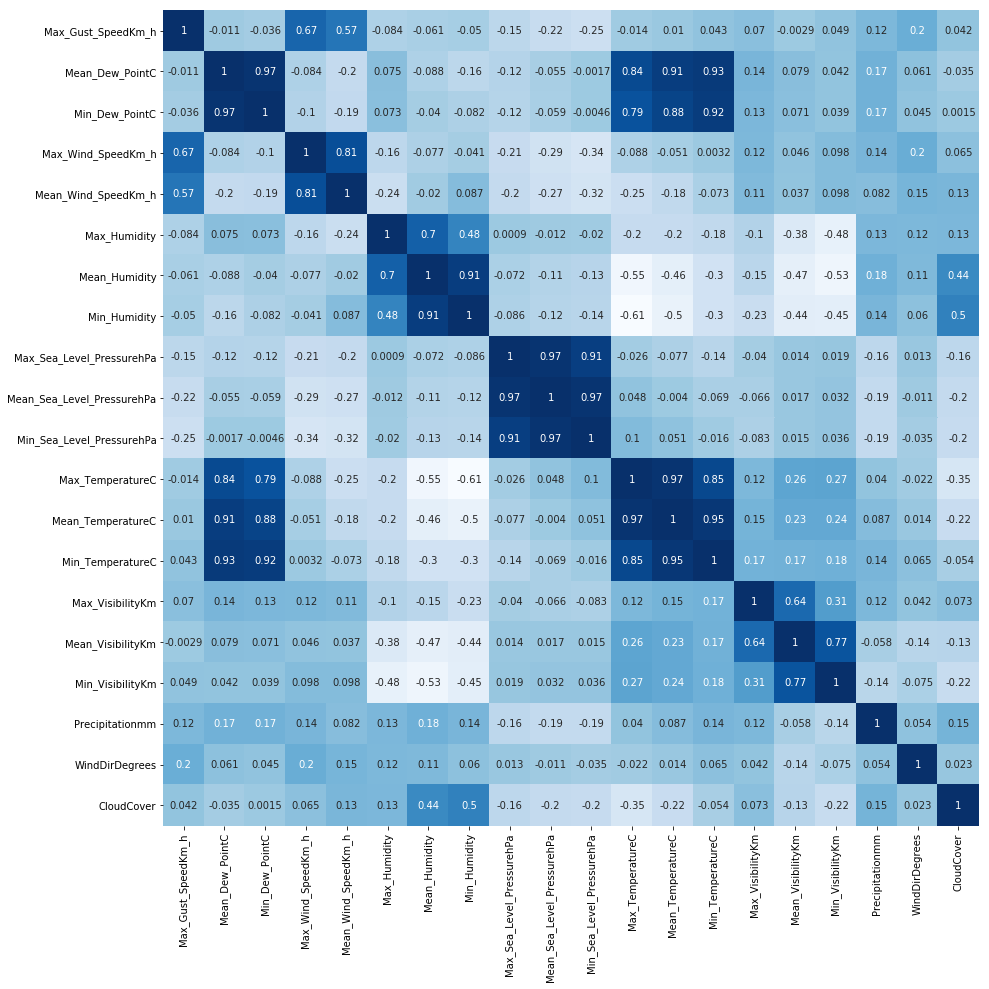

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(all_data_scaled[meteo_features_columns].corr(),
            square=True, annot=True, cmap="Blues", cbar=False);

* **correlations from same feature name are all correlated >0.5** except for:
    * *Visibility* between the "Max" and "Min" (note: consider that missing values are present)
    * *Humidity* between the "Max" and "Min" as can also be seen in the graph
* for **each meteo feature** "Max" and "Min" are **more correlated with "Mean"** as expected
* all **meteo features** are **highly correlated wrt themselves** (in the form of "Max", "Min", "Mean")
* *TemperatureC* and *DewPointC* are **highly correlated >~0.8**. With *Mean_DewPointC* being most correlated wrt *TemperatureC* variations
* *CloudCover* is highly correlated with *Humidity* (Min first and then Mean)

#### Correlation of most representative meteo features and meteo events

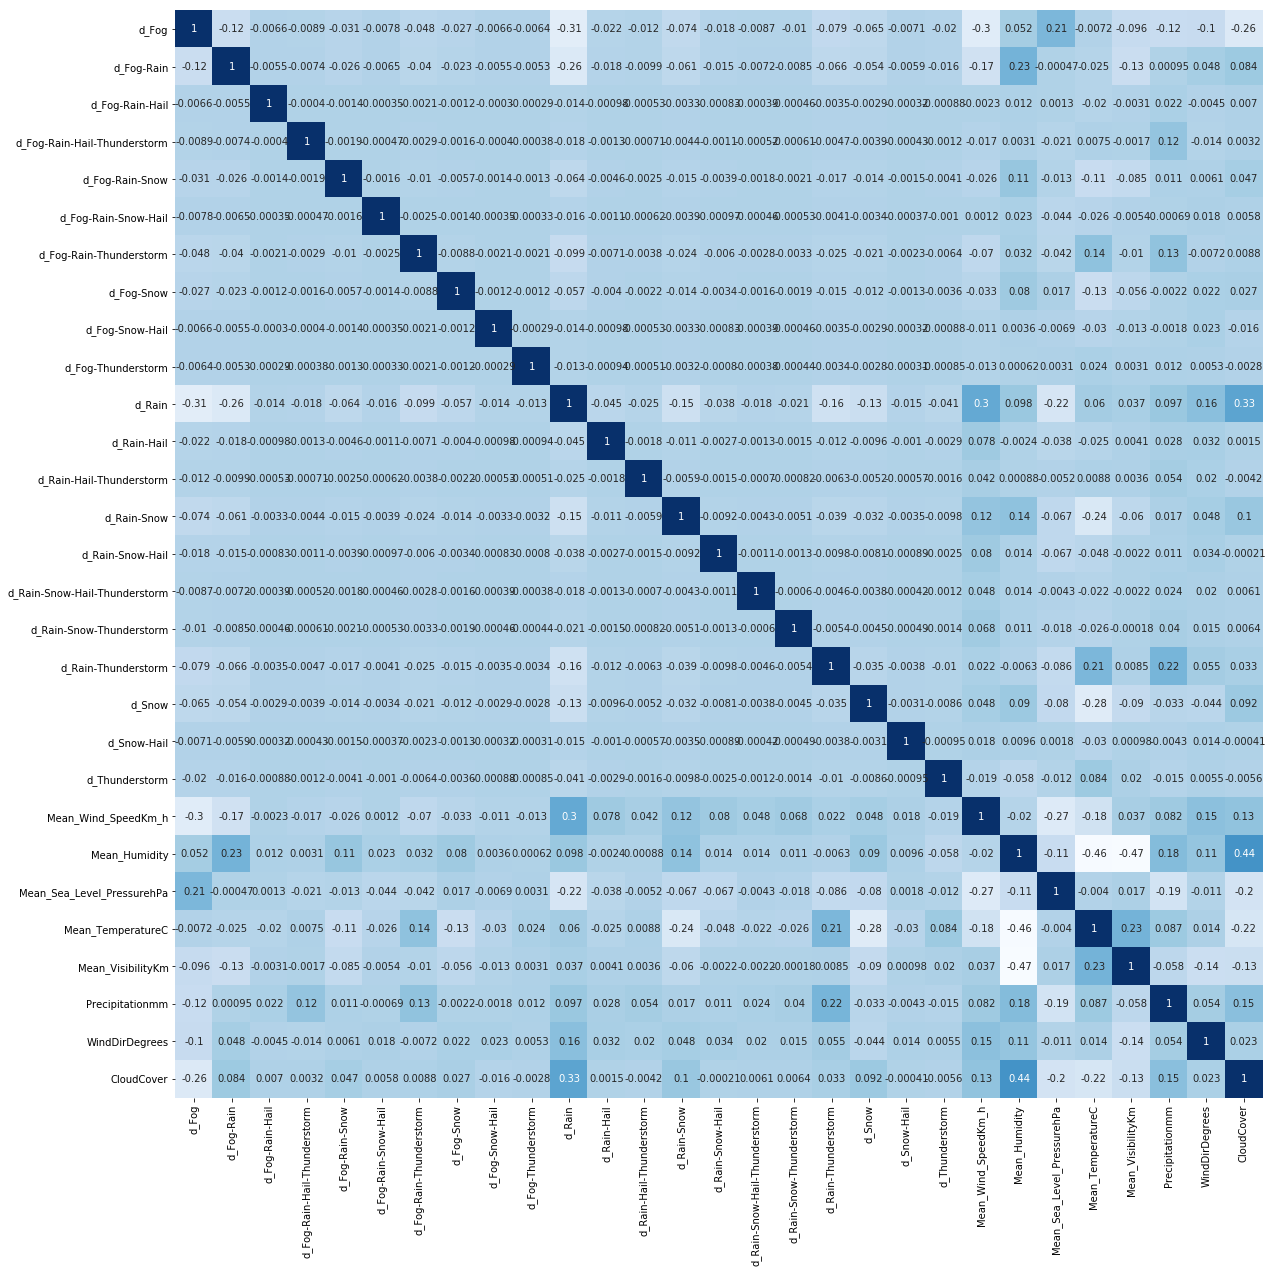

In [28]:
events_dummy = pd.get_dummies(all_data_scaled['Events'], prefix='d')

mostrepres_meteo_features_columns =\
[x for x in meteo_features_columns\
 if not (x.startswith('Max') or x.startswith('Min') or x == 'Mean_Dew_PointC')]

joined = events_dummy.join(all_data_scaled[mostrepres_meteo_features_columns])
joined_corr = joined.corr()

plt.figure(figsize = (20,20))
sns.heatmap(joined_corr, square=True, annot=True, cmap="Blues", cbar=False);

* *Events* as expected are **not correlated wrt to each other**
* Only weak correlations between events and meteo numerical features. Below are listed the most important correlations in order of importance (most interesting correlations (range 0.1/0.5))

In [29]:
s = joined_corr.unstack().sort_values(ascending=False)

# filter tuple keys with same value, inverted value and values < 0.5
s[[i[0]!=i[1] in i for i in s.index]].iloc[::2][s >= 0.1]

CloudCover               Mean_Humidity                   0.442588
                         d_Rain                          0.331823
Mean_Wind_SpeedKm_h      d_Rain                          0.296826
d_Fog-Rain               Mean_Humidity                   0.233367
Mean_TemperatureC        Mean_VisibilityKm               0.232974
d_Rain-Thunderstorm      Precipitationmm                 0.222771
d_Fog                    Mean_Sea_Level_PressurehPa      0.209039
Mean_TemperatureC        d_Rain-Thunderstorm             0.206582
Precipitationmm          Mean_Humidity                   0.179059
WindDirDegrees           d_Rain                          0.155767
CloudCover               Precipitationmm                 0.154447
WindDirDegrees           Mean_Wind_SpeedKm_h             0.149407
d_Fog-Rain-Thunderstorm  Mean_TemperatureC               0.135414
Mean_Humidity            d_Rain-Snow                     0.135389
CloudCover               Mean_Wind_SpeedKm_h             0.134706
d_Fog-Rain

# Correlation
Pearson correlation measures a linear dependence between two variables (x and y).

It can be used only when x and y are from normal distribution. The plot of y = f(x) is named the linear regression curve.

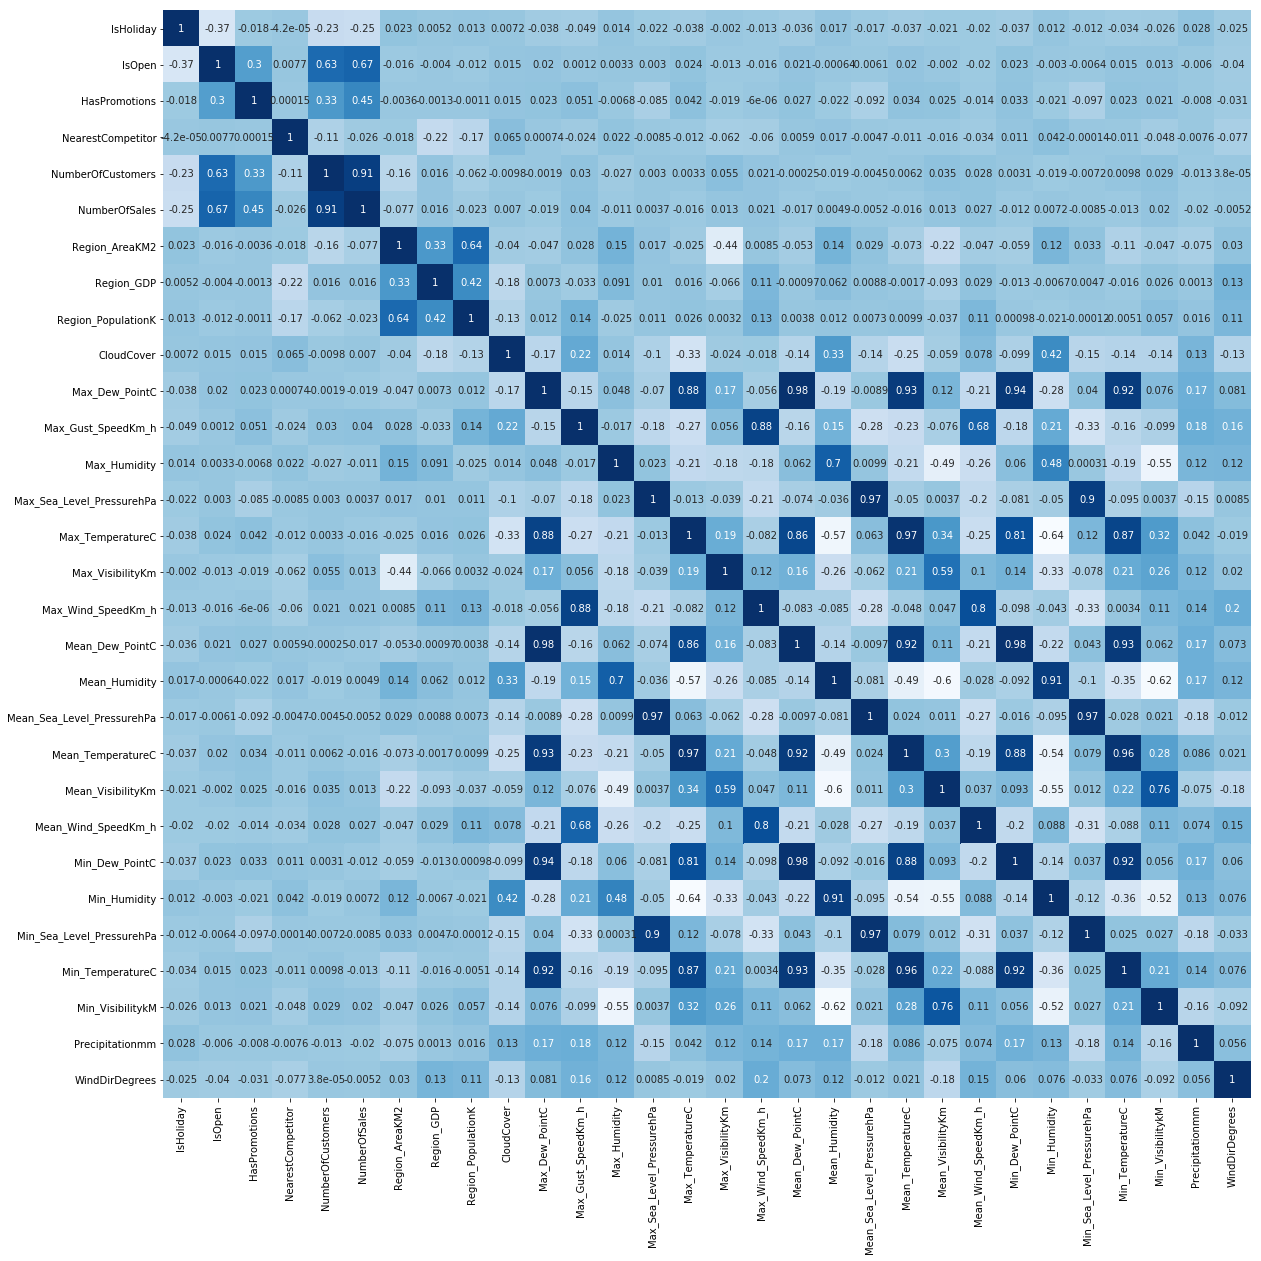

In [30]:
# Correlation
train_corr = train.drop(['StoreID'], axis=1).corr()

plt.figure(figsize = (20,20))
sns.heatmap(train_corr, square=True, annot=True, cmap="Blues", cbar=False);

*NumberOfSales* is:
* highly correlated (ordered):
    * NumberOfCustomers
    * IsOpen
    * HasPromotions
* negatively correlated:
    * IsHoliday

In [31]:
s = train_corr.unstack().sort_values(ascending=False)

# filter tuple keys with same value, inverted value and values < 0.5
s[[i[0]!=i[1] in i for i in s.index]].iloc[::2][s >= 0.2]

Max_Dew_PointC              Mean_Dew_PointC              0.982005
Min_Dew_PointC              Mean_Dew_PointC              0.975358
Mean_TemperatureC           Max_TemperatureC             0.972930
Mean_Sea_Level_PressurehPa  Min_Sea_Level_PressurehPa    0.972839
                            Max_Sea_Level_PressurehPa    0.969016
Min_TemperatureC            Mean_TemperatureC            0.955423
Min_Dew_PointC              Max_Dew_PointC               0.939334
Mean_Dew_PointC             Min_TemperatureC             0.934619
Mean_TemperatureC           Max_Dew_PointC               0.927545
Min_Dew_PointC              Min_TemperatureC             0.923514
Max_Dew_PointC              Min_TemperatureC             0.922529
Mean_Dew_PointC             Mean_TemperatureC            0.919965
Min_Humidity                Mean_Humidity                0.912418
NumberOfCustomers           NumberOfSales                0.909194
Min_Sea_Level_PressurehPa   Max_Sea_Level_PressurehPa    0.904841
Mean_Tempe

## Check the distribution of the NumberOfSales

mu = 4057.38 and sigma = 2729.63

Skewness: 0.66
Kurtosis: 1.76


/home/fra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


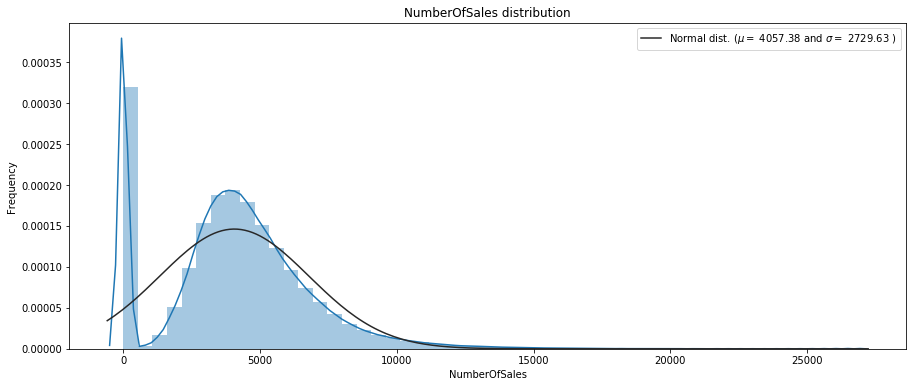

In [32]:
# fit the data with a normal distribution and check the fitted mu and sigma
(mu, sigma) = norm.fit(train['NumberOfSales'])
print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print('Skewness: {:.2f}'.format(train['NumberOfSales'].skew()))
print('Kurtosis: {:.2f}'.format(train['NumberOfSales'].kurt()))

# plot fitted norm
plt.figure(figsize=(15, 6))
sns.distplot(train['NumberOfSales'], fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
plt.show()

## Categorical Variables Exploration

### Daily sales per region

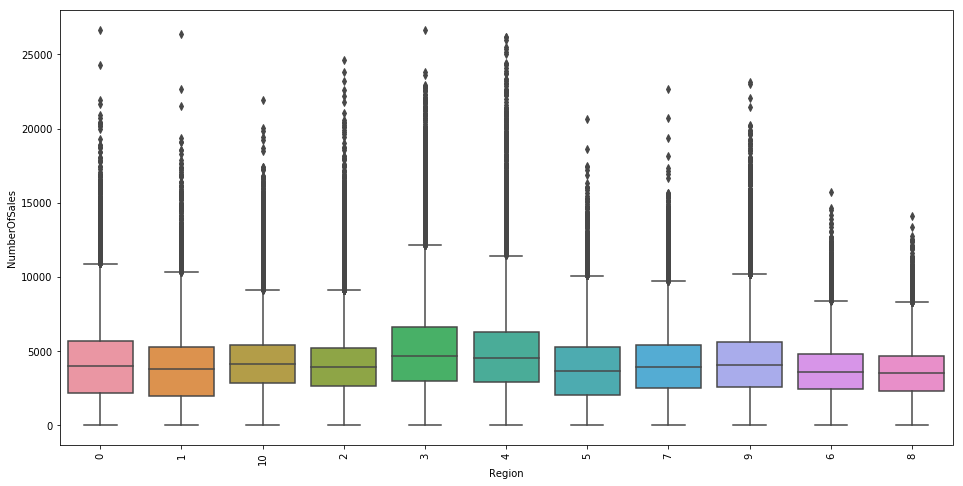

In [36]:
var = 'Region'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="NumberOfSales", data=train)
plt.xticks(rotation=90);

### Daily sales per store type

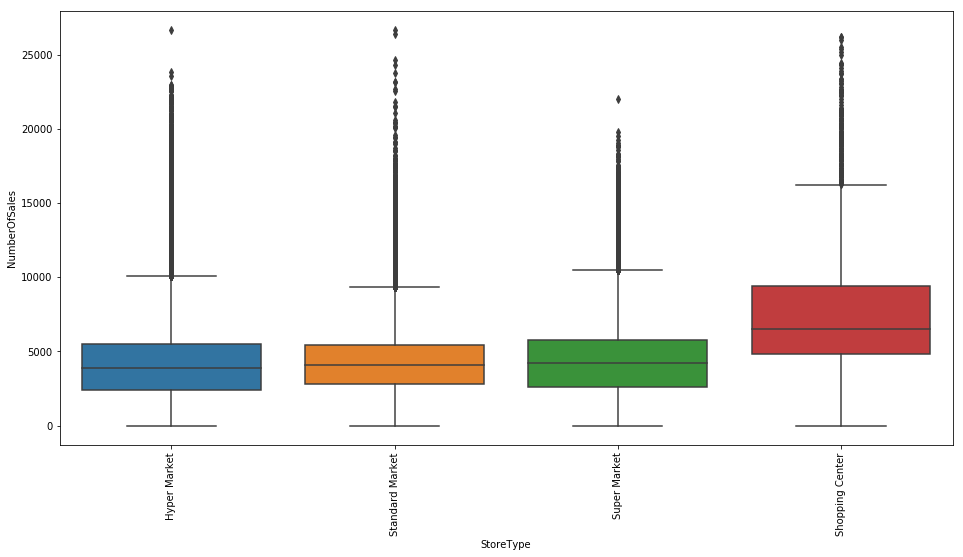

In [38]:
var = 'StoreType'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="NumberOfSales", data=train)
plt.xticks(rotation=90);

### Daily sales per assortment type

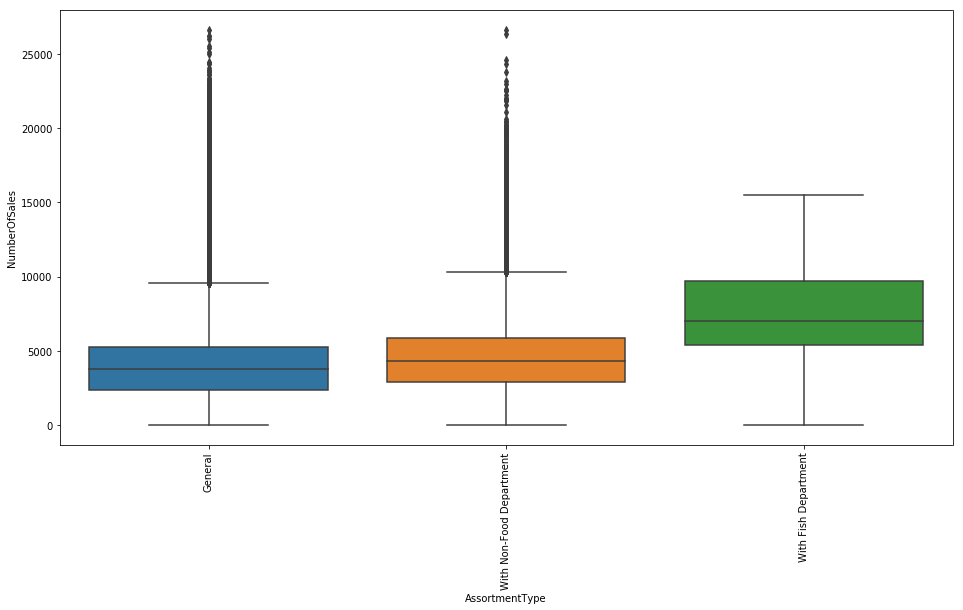

In [39]:
var = 'AssortmentType'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="NumberOfSales", data=train)
plt.xticks(rotation=90);

### Daily sales per Event type

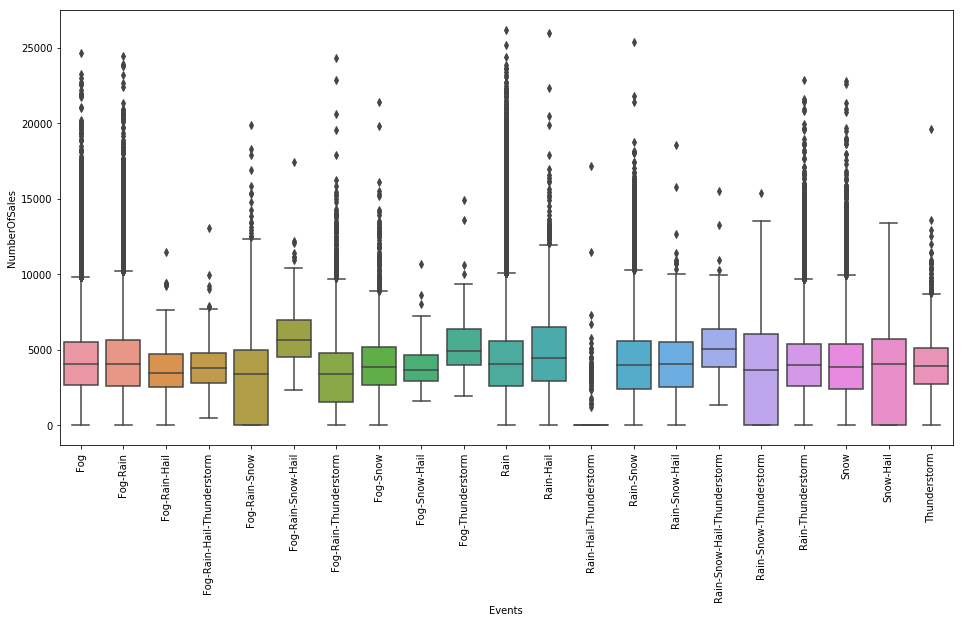

In [41]:
var = 'Events'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="NumberOfSales", data=train)
plt.xticks(rotation=90);